In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from matplotlib.patches import Patch


c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 1. Load and explore the dataset, visualizing the results of the exploration. Analyze the quality of the dataset and handle eventual quality issues.


In [2]:
data = pd.read_csv("weight_change_dataset.csv")
data

,Participant ID,Age,Gender,BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Smoking,Physical Activity Level,Sleep Quality,Stress Level,Work Sector,Final Weight (lbs)
0,0,56,M,3102.30,3916.00,NaN,14.57,1,-,Sedentary,Excellent,6,Public,228.60
1,1,46,M,2275.50,3823.00,1547.50,NaN,6,-,Very Active,Excellent,6,Public,167.80
2,2,32,M,2119.40,2785.40,666.00,NaN,7,Yes,Sedentary,Good,3,Self-Employed,144.20
3,3,25,M,2181.30,2587.30,406.00,3.37,8,-,Sedentary,Fair,2,Private,146.30
4,4,38,M,2463.80,3312.80,849.00,3.90,10,-,Lightly Active,Good,1,Unemployed,157.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,39,F,2526.30,NaN,1030.97,-12.84,4,-,Lightly Active,Good,5,Unemployed,166.73
596,596,41,F,2699.57,3546.90,847.33,4.58,8,-,Moderately Active,Good,6,Public,188.03
597,597,39,-,2651.40,3393.60,742.20,-7.53,9,-,Lightly Active,Fair,5,Private,189.50
598,598,41,F,2230.70,3442.70,NaN,4.61,6,-,Lightly Active,Fair,4,Self-Employed,159.03


In [3]:
data.describe()

,Participant ID,Age,BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,600.000000,600.000000,600.000000,544.000000,540.000000,544.000000,600.000000,600.000000,600.000000
mean,299.500000,40.633333,2507.488800,3489.047224,981.939611,-2.750533,6.665000,4.716667,168.341300
std,173.349358,26.724256,245.662118,351.436429,250.527087,6.934349,2.315537,1.677621,20.273139
min,0.000000,-17.000000,1566.500000,2030.900000,82.500000,-42.990000,1.000000,1.000000,98.200000
25%,149.750000,32.750000,2343.990000,3279.757500,817.367500,-6.425000,5.000000,4.000000,156.580000
50%,299.500000,38.000000,2515.620000,3530.750000,979.700000,-2.305000,7.000000,5.000000,168.950000
75%,449.250000,43.000000,2674.585000,3742.855000,1142.392500,1.475000,8.000000,6.000000,180.947500
max,599.000000,207.000000,3390.800000,4000.000000,1922.500000,18.140000,12.000000,9.000000,232.500000


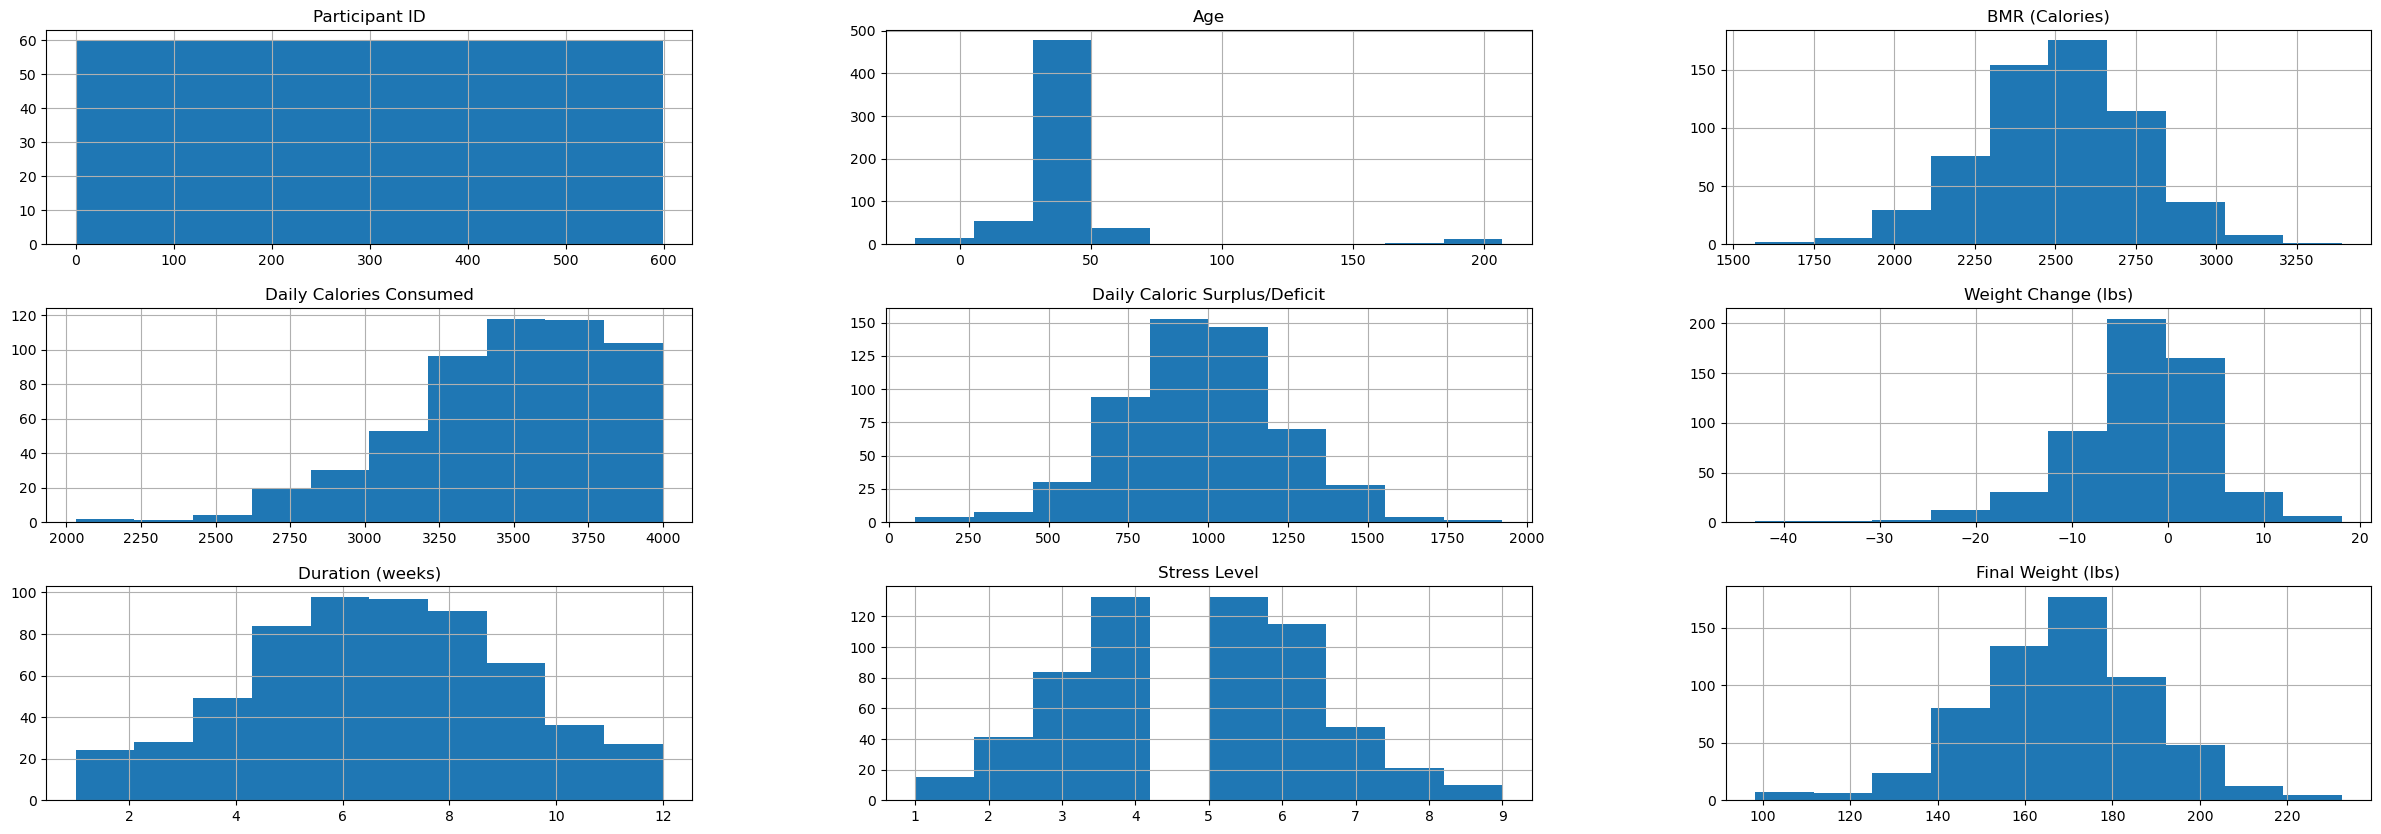

In [4]:
data.hist(figsize=(30, 10))
data.drop(columns="Participant ID", inplace=True)

All the data is distributed pretty normally

The age column has some unrealistic outlier values, which should be replaced with an approximation for that value

In [5]:
data.loc[data["Age"]<0, "Age"] = np.nan
data.loc[data["Age"]>100, "Age"] = np.nan

replace all the dashes of smoking column to No, because we can assume most people do not smoke

C:\Users\William\AppData\Local\Temp\ipykernel_17100\1698541571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Smoking"].replace({"-": "No"}, inplace=True)


<Axes: >

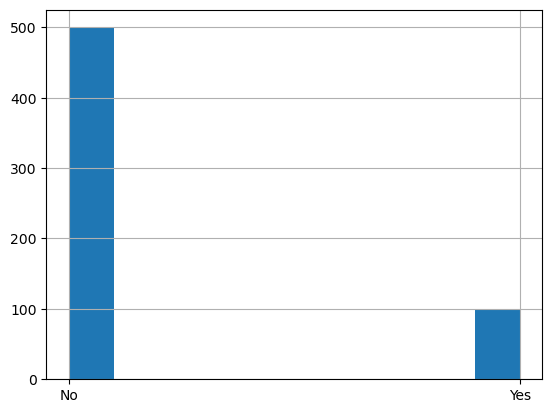

In [6]:
data["Smoking"].replace({"-": "No"}, inplace=True)
data["Smoking"].hist()

change all the rest of the dashes to nan

In [7]:
data.replace({"-": np.nan}, inplace=True)

there are quite a few nan values which we have to deal with

In [8]:
data.isna().sum()

Age                              30
Gender                           60
BMR (Calories)                    0
Daily Calories Consumed          56
Daily Caloric Surplus/Deficit    60
Weight Change (lbs)              56
Duration (weeks)                  0
Smoking                           0
Physical Activity Level           0
Sleep Quality                     0
Stress Level                      0
Work Sector                      60
Final Weight (lbs)                0
dtype: int64

encode the data

In [9]:
data["Gender"].replace({"M": 1, "F": 0}, inplace=True)
data["Smoking"].replace({"Yes": 1, "No": 0}, inplace=True)

C:\Users\William\AppData\Local\Temp\ipykernel_17100\896143037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Gender"].replace({"M": 1, "F": 0}, inplace=True)
C:\Users\William\AppData\Local\Temp\ipykernel_17100\896143037.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Gender"].re

In [10]:
work_sector_dummies = pd.get_dummies(data["Work Sector"], dtype=int)
data = pd.concat([data.drop(columns=["Work Sector"]), work_sector_dummies], axis=1)

dummies_cols = list(work_sector_dummies.columns)

for col in dummies_cols:
    data[col] = data[col].astype("category")


eoncoding ordinal columns

In [11]:
data["Sleep Quality"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very Good": 3, "Excellent": 4}, inplace=True)
data["Physical Activity Level"].replace({"Sedentary": 0, "Lightly Active": 1, "Moderately Active": 2, "Very Active": 3}, inplace=True)

C:\Users\William\AppData\Local\Temp\ipykernel_17100\1509716268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Sleep Quality"].replace({"Poor": 0, "Fair": 1, "Good": 2, "Very Good": 3, "Excellent": 4}, inplace=True)
C:\Users\William\AppData\Local\Temp\ipykernel_17100\1509716268.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

some of the numerical data is out of scale due to the units being different

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'BMR (Calories)'}>],
       [<Axes: title={'center': 'Daily Calories Consumed'}>,
        <Axes: title={'center': 'Daily Caloric Surplus/Deficit'}>,
        <Axes: title={'center': 'Weight Change (lbs)'}>],
       [<Axes: title={'center': 'Duration (weeks)'}>,
        <Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'Physical Activity Level'}>],
       [<Axes: title={'center': 'Sleep Quality'}>,
        <Axes: title={'center': 'Stress Level'}>,
        <Axes: title={'center': 'Final Weight (lbs)'}>]], dtype=object)

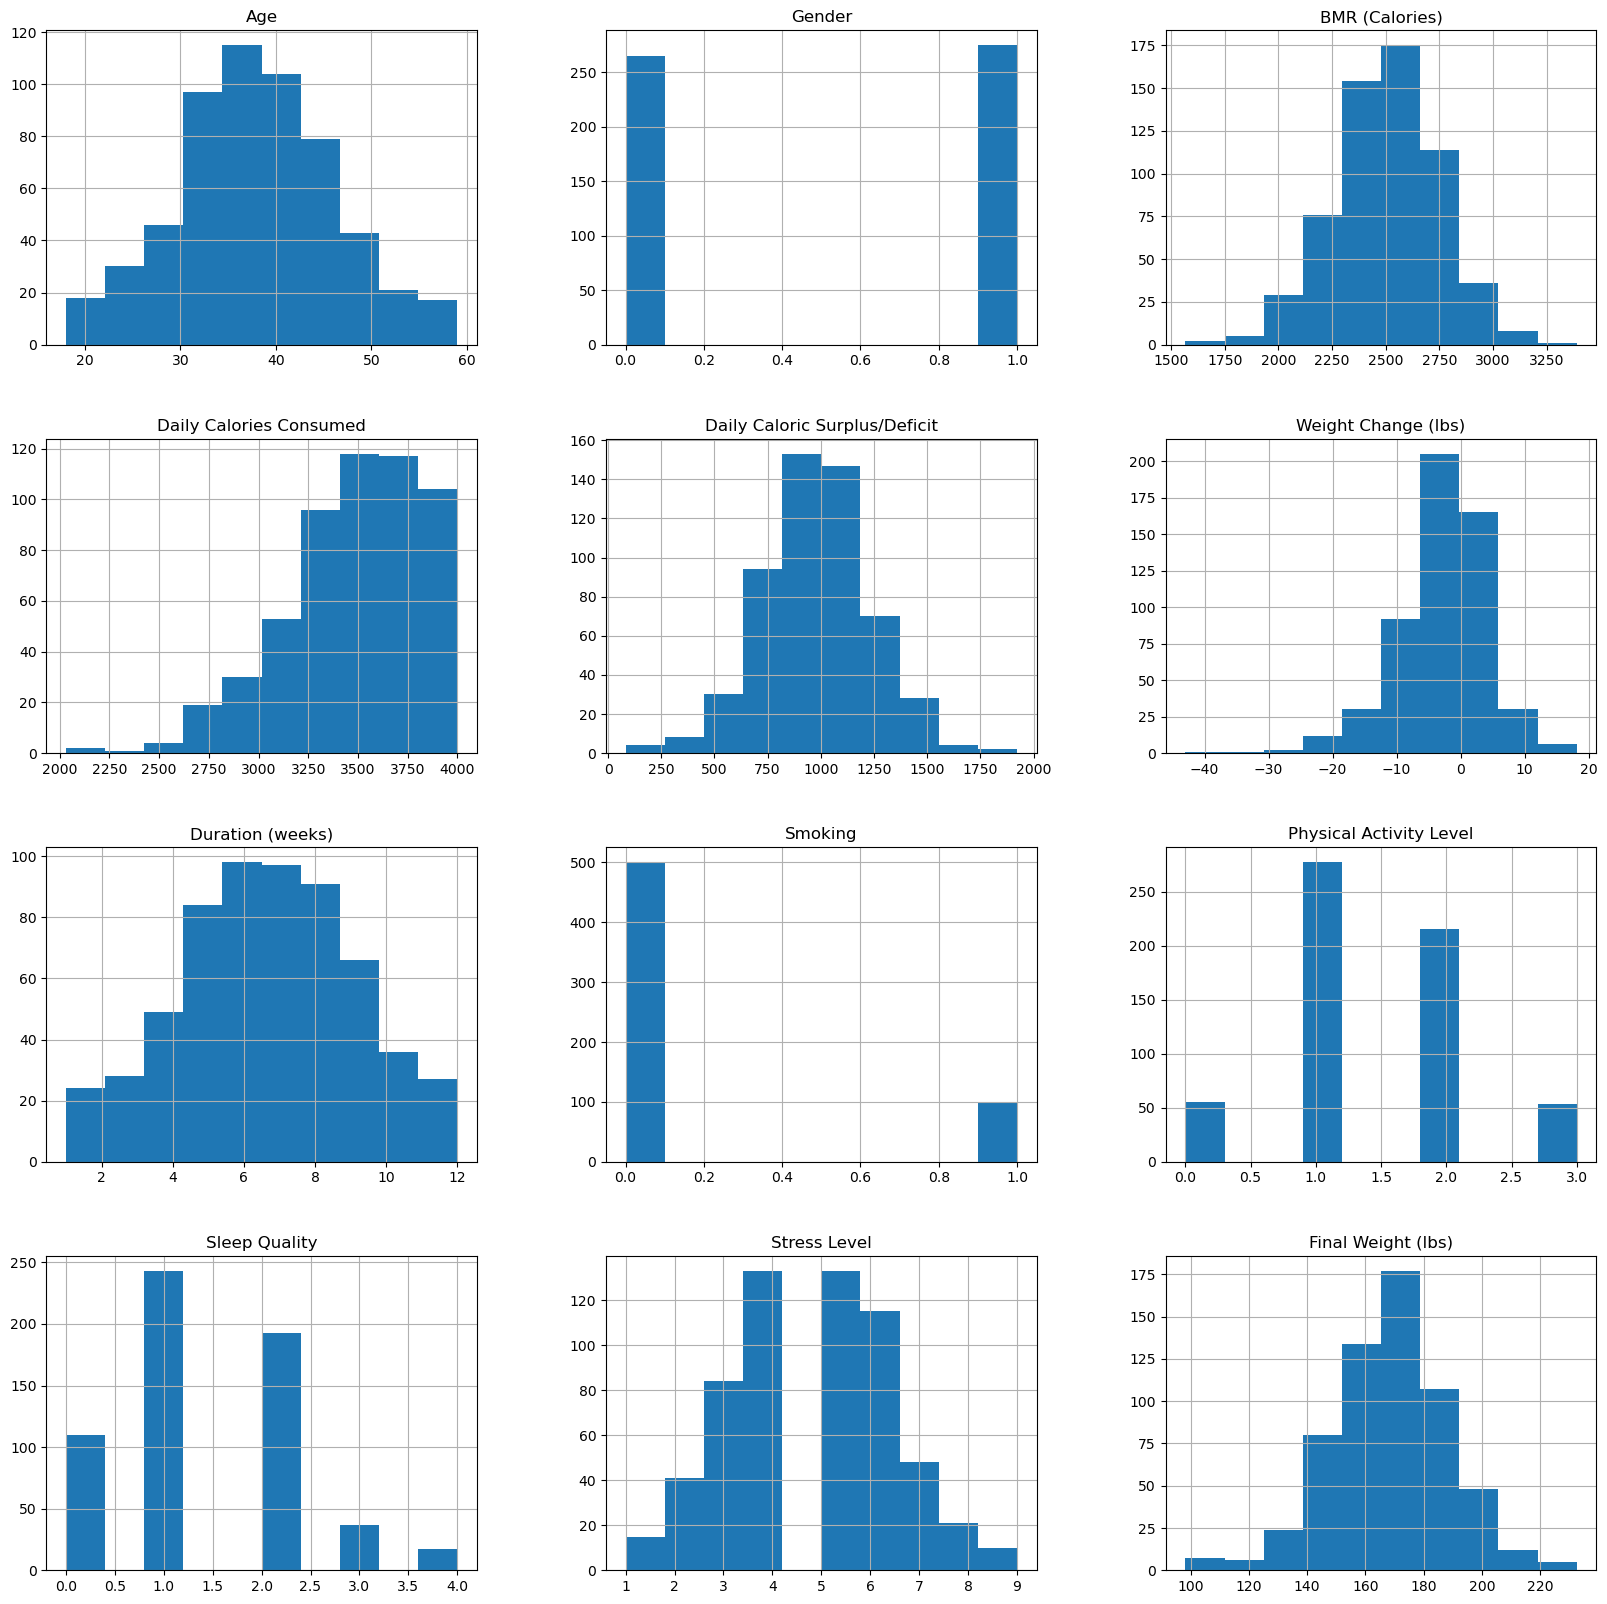

In [12]:
data.hist(figsize = (20, 20))

<Axes: >

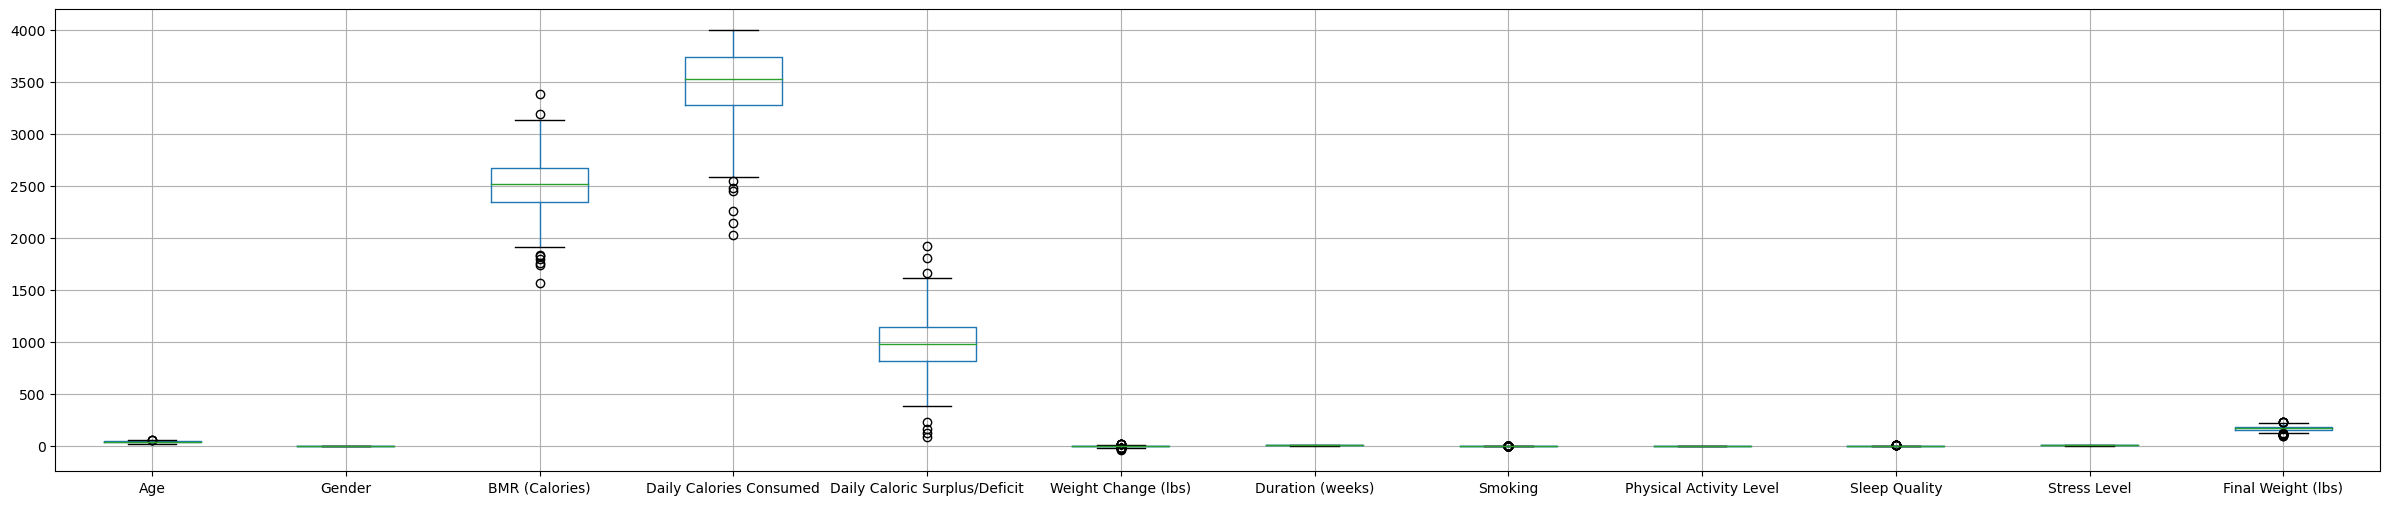

In [13]:
data.boxplot(figsize=(30, 6))

scale the columns which arent encoded and not gender or smoking. Scaled using Robust scaler so its not affected by outliers or 

In [14]:
unscaled_cols = ["Gender", "Smoking"] + dummies_cols 

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data.drop(columns=unscaled_cols))
scaled_data = pd.DataFrame(scaled_data, columns=data.drop(columns=unscaled_cols).columns)
scaled_data = pd.concat([scaled_data, data[unscaled_cols]], axis=1)

impute the data and choose best k

Text(0, 0.5, 'RMSE')

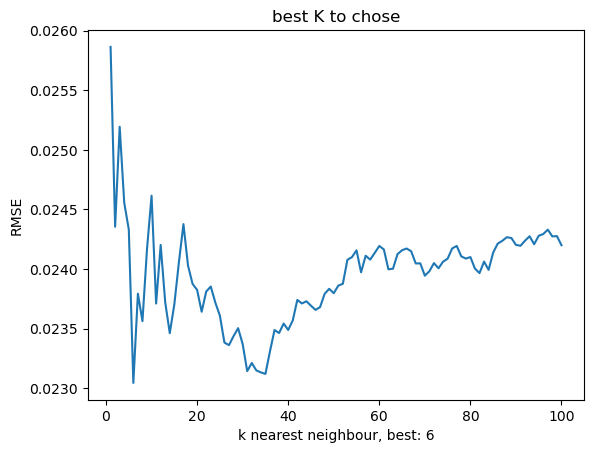

In [15]:
ks = range(1, 101)
rmse_li = []
minimum_rmse = np.inf

for k in ks:
    imputer = KNNImputer(n_neighbors=k, weights='distance', metric='nan_euclidean')
    imputer.fit(scaled_data)
    data_imputed_knn = pd.DataFrame(imputer.transform(scaled_data), columns=scaled_data.columns)

    X_train, X_test, y_train, y_test = train_test_split(data_imputed_knn.drop(columns=["Final Weight (lbs)"]), data_imputed_knn["Final Weight (lbs)"], test_size=0.25, random_state=42)

    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    rmse = np.sqrt(np.mean(lin_reg.predict(X_test)-y_test)**2)
    rmse_li.append(rmse)

    if rmse < minimum_rmse:
        minimum_rmse = rmse
        best_k = k

plt.plot(ks, rmse_li)
plt.title("best K to chose")
plt.xlabel(f"k nearest neighbour, best: {best_k}")
plt.ylabel("RMSE")


In [16]:
imputer = KNNImputer(n_neighbors=best_k, weights="distance", metric="nan_euclidean")
imputed_data = imputer.fit_transform(scaled_data)
imputed_data = pd.DataFrame(imputed_data, columns=scaled_data.columns)
scaled_data = imputed_data

are there duplicates?

In [17]:
scaled_data.duplicated().sum()

0

removing outliers

In [18]:
data_no_outliers = scaled_data.copy()

for column in ["Age", "BMR (Calories)", "Daily Caloric Surplus/Deficit", "Weight Change (lbs)", "Daily Calories Consumed"]:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data_no_outliers = data_no_outliers[(data_no_outliers[column] >= lower_bound) & (data_no_outliers[column] <= upper_bound)]

scaled_data = data_no_outliers

<Axes: >

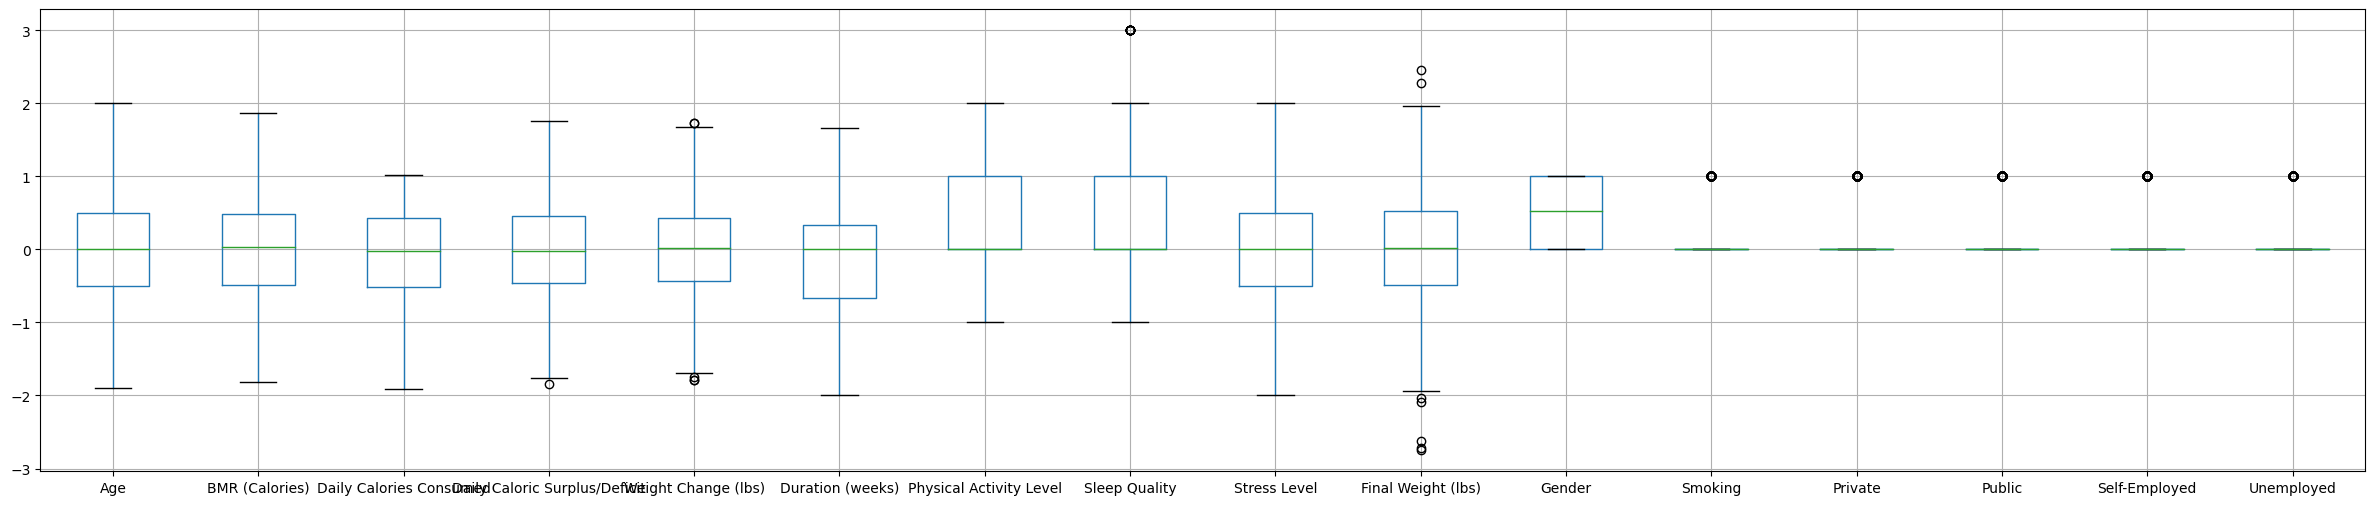

In [19]:
scaled_data.boxplot(figsize=(30, 6))

Looking at the histogram of the data it seams pretty well distributed, 
but I noticed there are many dashes in the smoking column, thus after looking at the distribution by putting "No" instead of the dashes, the ratio seemed right, in the sense, the No value in the smoking column had a higher count than the yes as is in real life.
There were also some very unrealistic age values which I assumed as missinput and decided to convert no Nan instead of deleting the row.
The work secotr column is categorical thus I one hot encoded.
Instead, the sleep quality and activity level were ordered thus I encoded their score.
To remove the Nans from the dataset, instead of deleting the rows containing any nan, I imputed the data to preserve the knowledge of the rows.
To have a better performance with the gradiant descent I scaled the data and removed the outliers since I know that the GD is very susceptible to unscaled data.$

# 2. Prepare the dataset for a Linear Regression task that aims to build a "Final Weight (lbs)" predictive model.


In [20]:
X = scaled_data.drop(columns=["Final Weight (lbs)"])
y = scaled_data["Final Weight (lbs)"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data.drop(columns=["Final Weight (lbs)"]), scaled_data["Final Weight (lbs)"], test_size=0.25, random_state=42)

## (a) Verify the feature values distribution of the numerical variables.


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'BMR (Calories)'}>,
        <Axes: title={'center': 'Daily Calories Consumed'}>],
       [<Axes: title={'center': 'Daily Caloric Surplus/Deficit'}>,
        <Axes: title={'center': 'Weight Change (lbs)'}>,
        <Axes: title={'center': 'Duration (weeks)'}>],
       [<Axes: title={'center': 'Physical Activity Level'}>,
        <Axes: title={'center': 'Sleep Quality'}>,
        <Axes: title={'center': 'Stress Level'}>]], dtype=object)

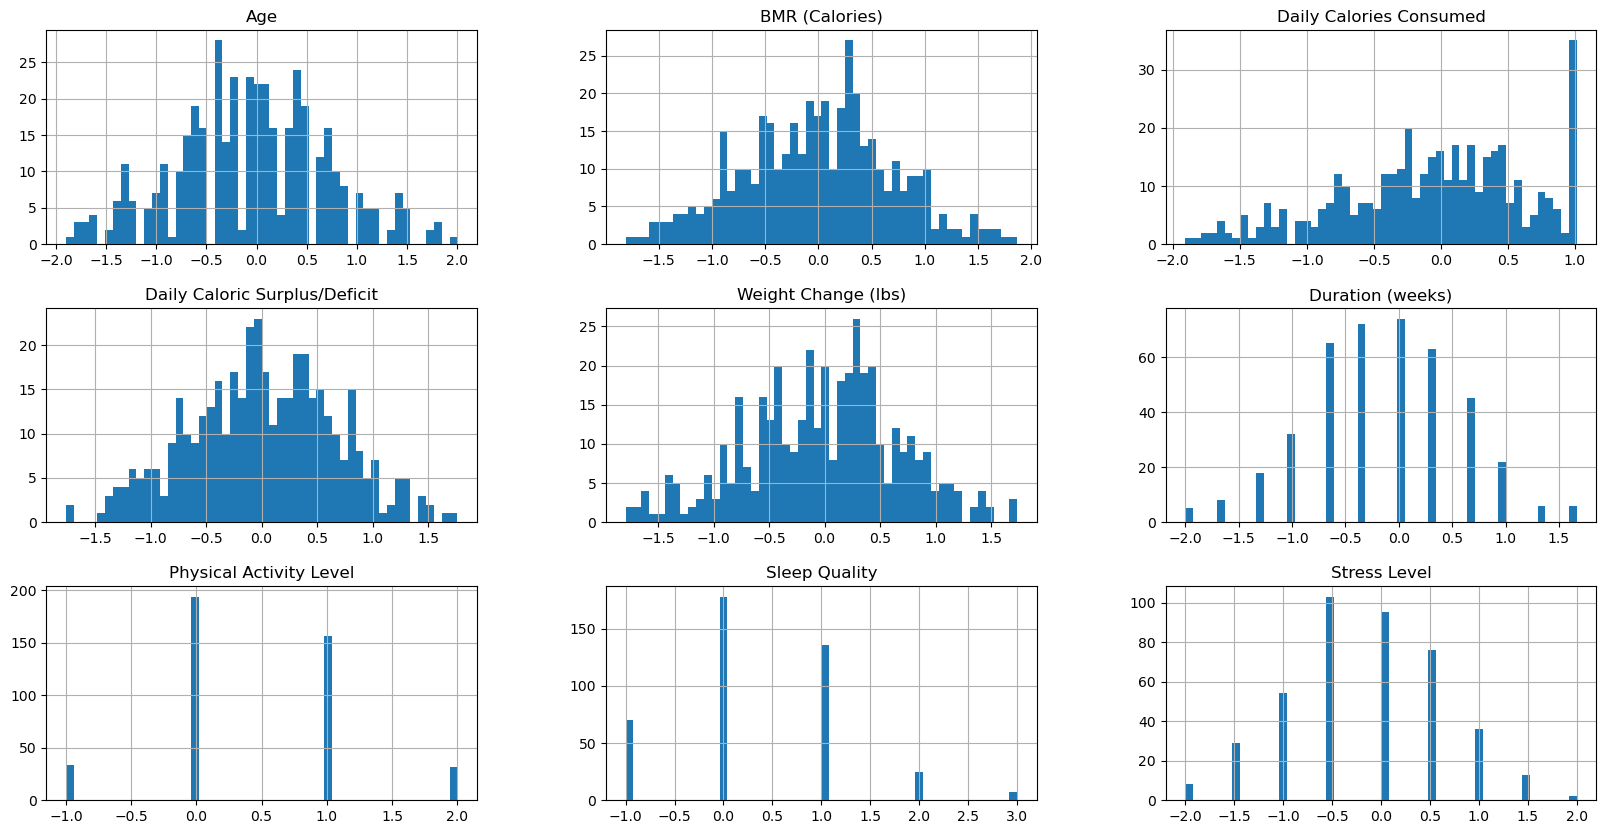

In [22]:
X_train.drop(columns=unscaled_cols).hist(figsize=(20, 10), bins=50)

<Axes: >

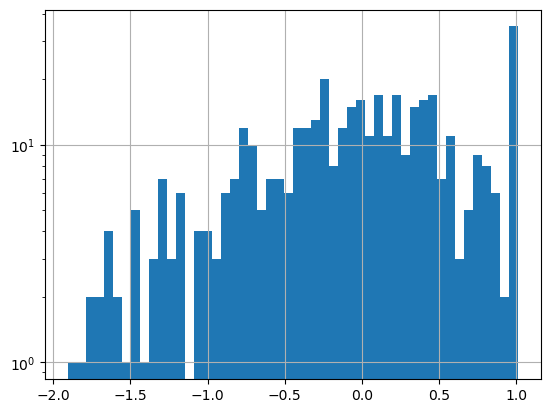

In [23]:
X_train["Daily Calories Consumed"].hist(log=True, bins=50)

the distribution of the numerical columns which I already imputed and encoded seems alright except for "Daily Calories Consumed" which seemed to have a smoewhat right skewed distribution, although after logging the values, it was arguably worse and sice they arent too badly distributed, I decided to leave the column as it is

## (b) Perform, if necessary, features transformation for the numerical variables, justifying your choices.

I have alreay scaled the numerical features, I scaled all the features which are not categorical or numerical

## (c) Perform, if necessary, encoding of the categorical variables, justifying your choices.

I have already encoded the features, I encoded the categrorical features of work sector, and the binary features male female and smoking finally also the ordinal features of sleep quality and activity level

## (d) Reason about the possibility of decreasing the dimensionality (number of features) of the dataset. Verify if different methodologies of feature selection do choose the same important features: adopt at least a univariate method, an iterative method, and a model-based method exploiting a linear regression model.


### model feature selection

I used the lasso as model feture selection using a small value for alpha since we dont have many features to start with

([], [])

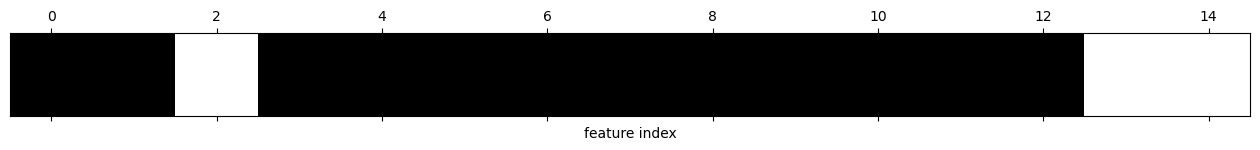

In [24]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.002, random_state=42)  # Regularization strength have to keep it small to have enough features due to not having alot to start with
model.fit(X_train, y_train)
selected_features = model.coef_ != 0

mask = selected_features
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature index")
plt.yticks(())


In [25]:
model_f_selection_cols = X.columns[mask]
num_features = len(model_f_selection_cols)

ANOVA, univariate feature selection

([], [])

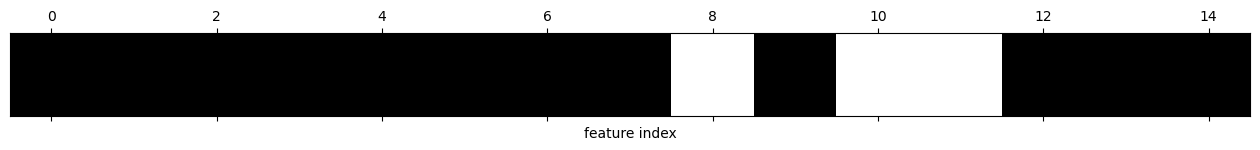

In [26]:
f_selector = SelectKBest(f_classif, k=num_features)
X_selected = f_selector.fit_transform(X_train, y_train)

mask = f_selector.get_support()

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature index")
plt.yticks(())


In [27]:
univariate_f_selection_cols = X.columns[mask]

iterative feature selection with decision tree regressor as model

([], [])

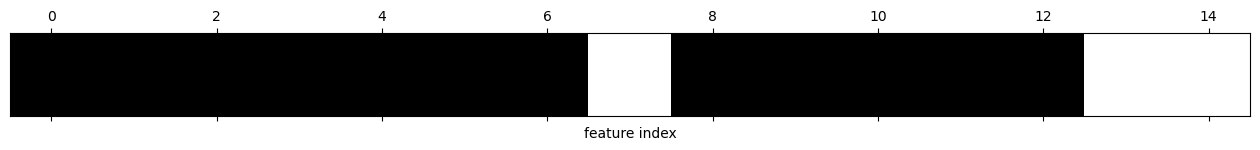

In [28]:
select = RFE(estimator=LinearRegression(), n_features_to_select=num_features)
select.fit(X_train, y_train)

mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("feature index")
plt.yticks(())


In [29]:
it_f_selection_cols = X.columns[mask]

since the dataset doesn't have too many features I am going to select most to make the models explainable enough

In [30]:
important_features = []
for feature in X.columns:
    if feature in it_f_selection_cols and feature in model_f_selection_cols and feature in univariate_f_selection_cols:
        important_features.append(feature)

## (e) On the base of the analysis performed above, define a dataset that you will exploit in the rest of the project (dataset_reduced), for the supervised task.

In [31]:
dataset_reduced = X[important_features]

Here I just selected the features that all 3 feature selection models felt being most important.

# 3. Build a supervised system based on Linear Regression capable of predicting the Final Weight (lbs) under the two conditions specified in the preamble (perform the following tasks for both conditions separately). Implement different approaches:


### (1. Knowing in advance the subjects’ Basal Metabolic Rate (BMR) at the beginning of the diet period (variable BMR (Calories) included in the set of available information))


In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced, y, test_size=0.25, random_state=42)

## (a) Linear Regression exploiting the sklearn implementation of the algorithm.


just regular sklearn model

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

0.8405267069082899

determined the theta for the sk learn implementation

In [34]:
rmse_sk_reg_bmr = np.sqrt(np.mean(lin_reg.predict(X_test) - y_test)**2)
rmse_sk_reg_bmr

0.026060910227755158

## (b) Linear Regression exploiting a Batch Gradient Descent learning procedure (not the sklearn implementation). Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.

added a column of ones to the X_train
and modified the y so i can use it in the gradient descent

In [35]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y = np.array(y_train.values.reshape(len(y_train), 1))

after trying out different ranges of values for eta I chose 0-0.2, and iterated for 100 times to reduce computational cost, then I iterated 100 times in th GD for each eta to then find the best one, I plotted the relative RMSE after each eta iteration

Text(0, 0.5, 'RMSE')

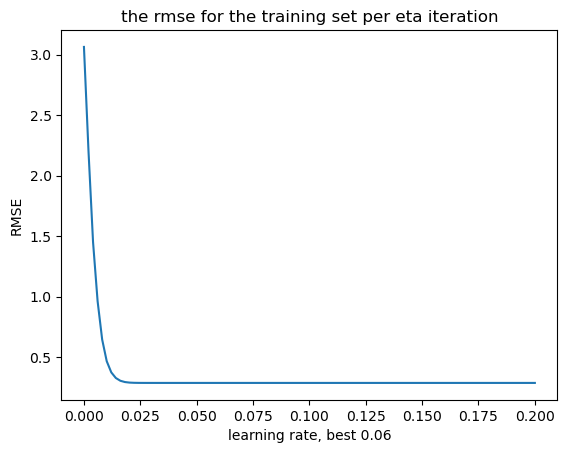

In [36]:
learning_rates = np.linspace(0, 0.2, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

In [37]:
reduced_batch_best_eta = best_eta

applied the best eta found to a new GD where i set a tollerance and iterated 1000 times

Text(0, 0.5, 'RMSE')

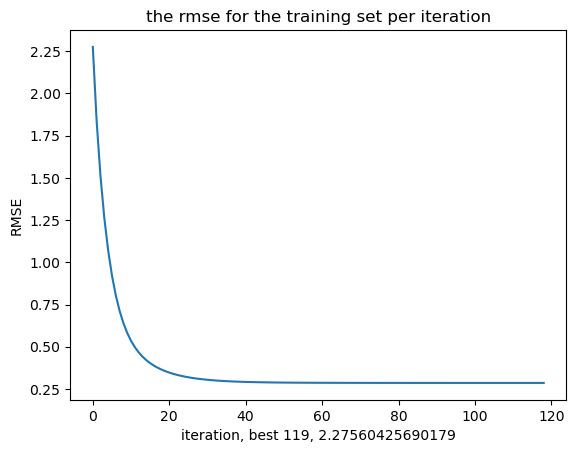

In [38]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}, {rmse_train[0]}")
plt.ylabel("RMSE")

In [39]:
reduced_batch_best_theta = theta

## (c) Linear Regression exploiting a Mini-Batch Gradient Descent learning procedure (not the sklearn implementation), exploiting a mini-batch size of maximum 128 samples (use mini-batch sizes as power of 2). Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.

here I did the same as the batch GD but in mini batches, and again, I iterate over a fine tuned range of eta values to find the best

Text(0, 0.5, 'RMSE')

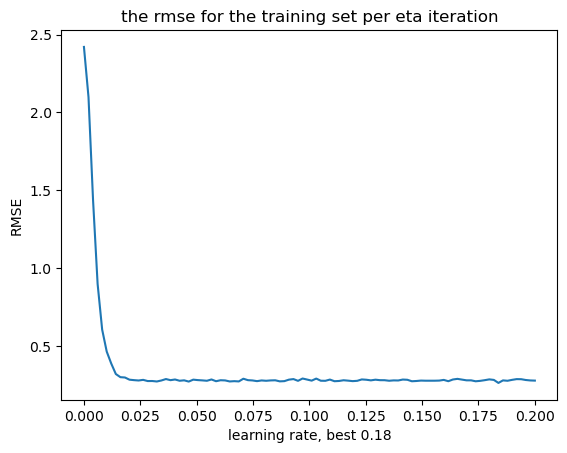

In [40]:
learning_rates = np.linspace(0, 0.2, 100)
epoches = 100
batch_size = 50
m, n = X_b.shape

minimum_rmse = [np.inf]

rmse_train = []

theta = np.random.randn(n, 1)

for eta in learning_rates:
    epoche_rmse = []

    for epoche in range(epoches):
        rnd_idx = np.random.permutation(m)
        X_shuffled = X_b[rnd_idx]
        y_shuffled = y[rnd_idx]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)
            theta = theta - eta * gradients

            rmse = np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2))

            norm_gradients = np.linalg.norm(gradients)

        epoche_rmse.append(rmse)
        
    if np.mean(epoche_rmse) < minimum_rmse:
        minimum_rmse = np.mean(epoche_rmse)
        best_eta = eta

    rmse_train.append(np.mean(epoche_rmse))

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

In [41]:
reduced_mini_batch_best_eta = best_eta

plotted the GD RMSE over its iterations based on the best eta

Text(0, 0.5, 'RMSE')

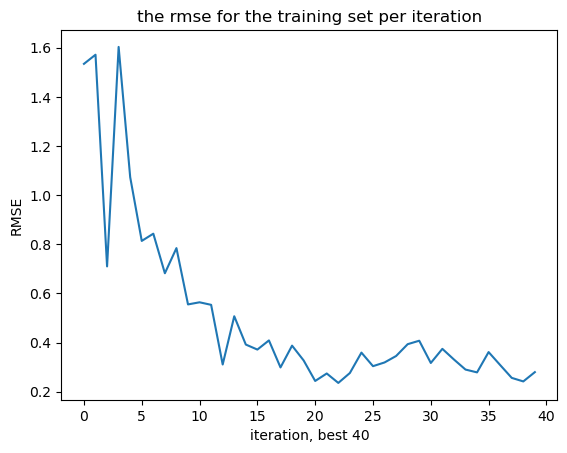

In [42]:
eta = best_eta
epoches = 1000
batch_size = 50
tollerance = 0.018
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

j = 0
for epoche in range(epoches):
    rnd_idx = np.random.permutation(m)
    X_shuffled = X_b[rnd_idx]
    y_shuffled = y[rnd_idx]

    epoche_n_g = []

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)
        theta = theta - eta * gradients

        norm_gradients = np.linalg.norm(gradients)
        epoche_n_g.append(norm_gradients)

    rmse_train.append(np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2)))

    j += 1
    if np.mean(epoche_n_g) < tollerance:
        break

plt.plot(range(j), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {j}")
plt.ylabel("RMSE")


got the overall rmse of the best theta I could find with this model

In [43]:
X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))

reduced_mini_batch_best_theta = theta
rmse_batch_reduced_with_bmr = np.sqrt(np.mean((X_b_test.dot(reduced_batch_best_theta) - y_b_test)**2))
rmse_mini_batch_reduced_with_bmr = np.sqrt(np.mean((X_b_test.dot(reduced_mini_batch_best_theta) - y_b_test)**2))

Here the reasoning behind my code is very similar to the other implemenation for the batch GD except I did it in mini batches

## (d) Consider the complete dataset and eventually add interaction or polynomial features (dataset_augmented). With this dataset, train a new Linear regression model based on a Batch Gradient Descent learning procedure (not the sklearn implementation). Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.

for the augmented data I did a grid search to determine the best degree to use in the augmented data which I evaluated using linear regressions RMSEs

Text(0, 0.5, 'rmse')

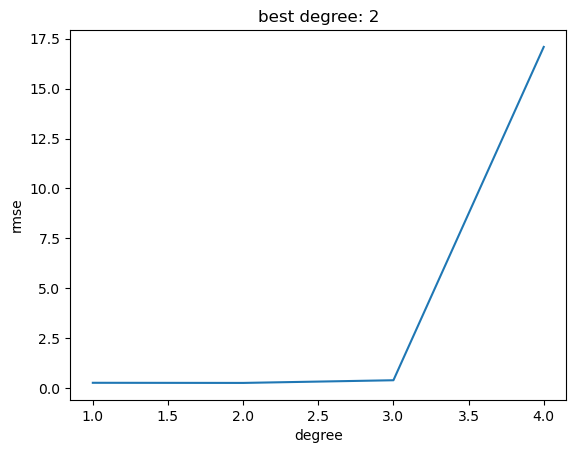

In [44]:
min_socre = np.inf
best_degree = 1
degrees = range(1, 5)

rmse_list = []

for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)

    X_poly_test = poly_features.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    rmse = np.sqrt(np.mean((lin_reg.predict(X_poly_test) - y_test)**2))

    rmse_list.append(rmse)

    if rmse < min_socre:
        min_socre = rmse
        best_degree = deg

plt.plot(degrees, rmse_list)
plt.title(f"best degree: {best_degree}")
plt.xlabel("degree")
plt.ylabel("rmse")

# the problem is that I am getting inconsistent best degrees which affect the rest of the evaluations, solution: use random state 42

created the augmented dataset with all the old data plus degreee 2 polynomial features

In [45]:
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
dataset_augemented = poly_features.fit_transform(X)
dataset_augemented = pd.DataFrame(dataset_augemented)

for i, col in enumerate(X.columns):
    dataset_augemented.rename({dataset_augemented.columns[i]: col}, axis=1, inplace=True)

dataset_augemented.columns = dataset_augemented.columns.astype(str)

In [46]:
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(dataset_augemented, scaled_data["Final Weight (lbs)"], test_size=0.25, random_state=42)

In [47]:
X_b = np.c_[np.ones((len(X_train_aug), 1)), X_train_aug]
y = np.array(y_train_aug.values.reshape(len(y_train_aug), 1))

here after a lot of fine tuning to find th best eta, I ended up with 0.12 and I understand that in the plot it shows that the eta might become better, but, the augemnted dataset is very susceptible to small changes, therefore even if I slightly increase the range the RMSE goas too high. But I found 0.12 to be a good enough learning rate for my anaysis

Text(0, 0.5, 'RMSE')

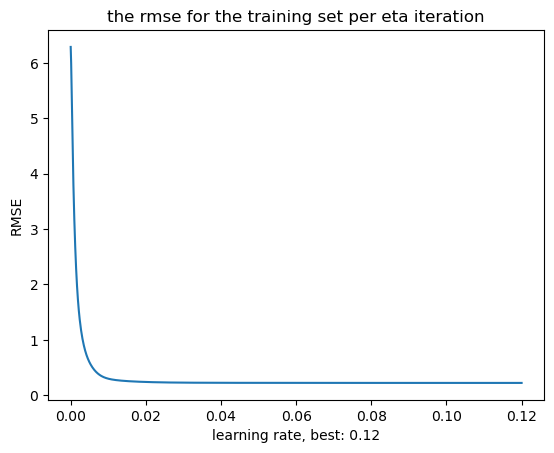

In [48]:
learning_rates = np.linspace(0, 0.12, 1000)
iterations = 100
m, n = X_b.shape
rmse_list = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y)**2))
        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_list.append(rmse)

plt.plot(learning_rates, rmse_list)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best: {round(best_eta, 3)}")
plt.ylabel("RMSE")
# plt.yscale("log")       # log the y values to better see the change

In [49]:
data_augmented_best_eta = best_eta

here I can see that with that theta, the model reaches the tollerance after less than 1000 iterations

Text(0, 0.5, 'RMSE')

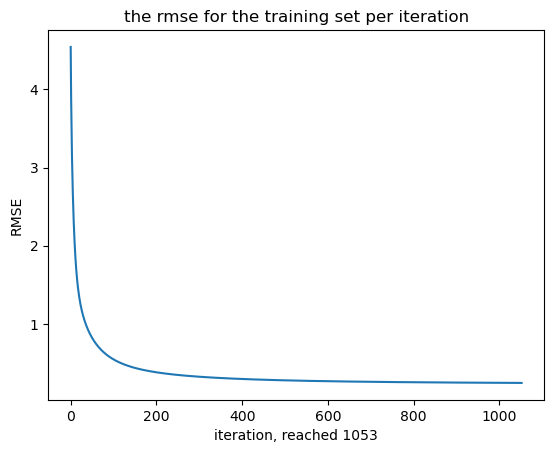

In [50]:
learning_rates = best_eta
iterations = 2000
tollerance = 0.01
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, reached {i}")
plt.ylabel("RMSE")

# the rmse decreases as long as for each iteration thus is up to you how many iterations you want to do

## (e) Compare the related learning curve of the Gradient Descent-based approaches developed above and comment both on the learning procedure and on the generalization performances of the model.

In [51]:
y = scaled_data["Final Weight (lbs)"]

In [52]:
dataset_reduced

,Age,BMR (Calories),Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Gender,Public
1,0.800000,-0.726327,1.746943,0.047767,-0.333333,2.0,1.000000,1.0
2,-0.600000,-1.198506,-0.965157,0.370534,0.000000,-1.0,1.000000,0.0
4,0.000000,-0.156748,-0.402123,0.785443,1.000000,0.0,1.000000,0.0
6,-0.200000,-1.585989,-0.115683,-0.706962,-1.666667,1.0,1.000000,0.0
10,-0.176085,0.978478,0.840658,0.585443,-0.666667,2.0,1.000000,0.0
...,...,...,...,...,...,...,...,...
595,0.100000,0.032305,0.157742,-1.333544,-1.000000,0.0,0.000000,0.0
596,0.300000,0.556421,-0.407261,0.871519,0.333333,1.0,0.000000,1.0
597,0.100000,0.410714,-0.730713,-0.661392,0.666667,0.0,0.153863,0.0
598,0.300000,-0.861840,-0.094839,0.875316,-0.333333,0.0,0.000000,0.0


this function calculates the RMSE of a model over training set size

In [53]:
def plot_learning_curves(model, X, y):

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
  train_errors, val_errors = [], []

  for m in range(1, len(X_train)):

    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "b-+", linewidth=1, label="train")
  plt.plot(np.sqrt(val_errors), "r-", linewidth=2, label="eval")

Insetad this learning curve is simply following a gradient descent using the best eta but also evaluation the test set RMSE

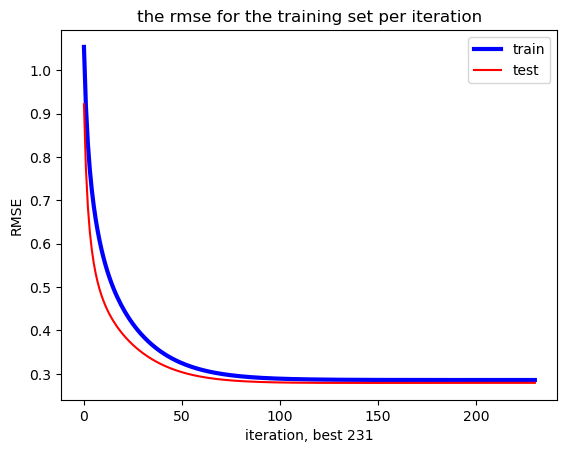

In [54]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
    theta = theta - eta * gradients

    rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
    rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

    norm_gradients = np.linalg.norm(gradients)
    i += 1
    if norm_gradients < tollerance:
        break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

### for reduced dataset

The lines are very similar at the start because both sets of data have not been learnt, the learning curves show a positive results because both for the training and test set the theta is reducing the rmse for both sets but at the same time the test set has a slightly smaller rmse because the theta is learnt with respect to the train set.

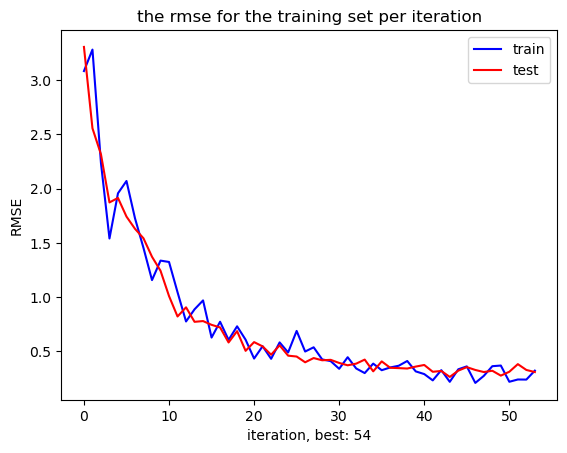

In [55]:
# for mini batch and reduced data

X_train, X_test, y_train, y_test = train_test_split(dataset_reduced, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))

eta = best_eta
epoches = 1000
batch_size = 50
tollerance = 0.021
m, n = X_b.shape
m_t, n_t = X_b_test.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

j = 0
for epoche in range(epoches):
    rnd_idx = np.random.permutation(m)
    rnd_idx_t = np.random.permutation(m_t)

    X_shuffled = X_b[rnd_idx]
    y_shuffled = y_b[rnd_idx]

    X_shuffled_t = X_b_test[rnd_idx_t]
    y_shuffled_t = y_b_test[rnd_idx_t]

    epoche_n_g = []

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)
        theta = theta - eta * gradients

        norm_gradients = np.linalg.norm(gradients)
        epoche_n_g.append(norm_gradients)

    rmse_train.append(np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2)))

    for i in range(0, m_t, batch_size):
        
        X_batch_t = X_shuffled_t[i:i+batch_size]
        y_batch_t = y_shuffled_t[i:i+batch_size]

    rmse_test.append(np.sqrt(np.mean((X_batch_t.dot(theta) - y_batch_t)**2)))

    j += 1
    if np.mean(epoche_n_g) < tollerance:
        break

plt.plot(range(j), rmse_train, "b", label="train")
plt.plot(range(j), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best: {j}")
plt.ylabel("RMSE")
plt.legend()

Same as before, even if less linear, in mini batch gradiant descent the train data is being learnt and generalized as shown for the performance on the test data

In [56]:
dataset_augemented

,Age,BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Gender,...,125,126,127,128,129,130,131,132,133,134
0,0.800000,-0.726327,0.631077,1.746943,0.047767,-0.333333,2.0,3.0,0.5,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.600000,-1.198506,-1.609488,-0.965157,0.370534,0.000000,-1.0,1.0,-1.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,-0.156748,-0.470635,-0.402123,0.785443,1.000000,0.0,1.0,-2.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.200000,-1.585989,-1.289901,-0.115683,-0.706962,-1.666667,1.0,-1.0,0.0,1.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.176085,0.978478,1.013286,0.840658,0.585443,-0.666667,2.0,-1.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,0.100000,0.032305,-0.178306,0.157742,-1.333544,-1.000000,0.0,1.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
551,0.300000,0.556421,0.034874,-0.407261,0.871519,0.333333,1.0,1.0,0.5,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
552,0.100000,0.410714,-0.296158,-0.730713,-0.661392,0.666667,0.0,0.0,0.0,0.153863,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
553,0.300000,-0.861840,-0.190133,-0.094839,0.875316,-0.333333,0.0,0.0,-0.5,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Augmented data



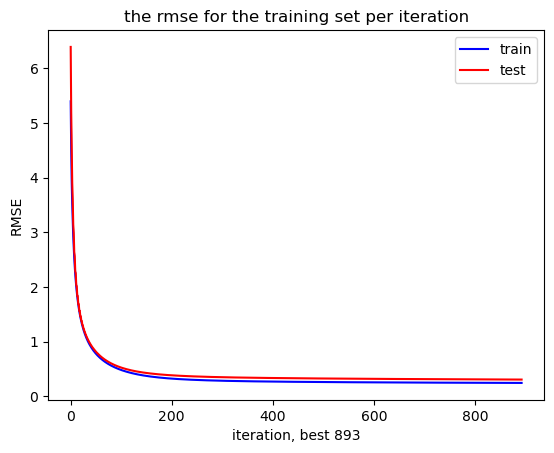

In [57]:
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = data_augmented_best_eta
iterations = 2000
tollerance = 0.01
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

here I observe the leanring rate as the training set increases. At the final iterations you can see the model converges to a constant value of RMSE meaning that it cant become batter

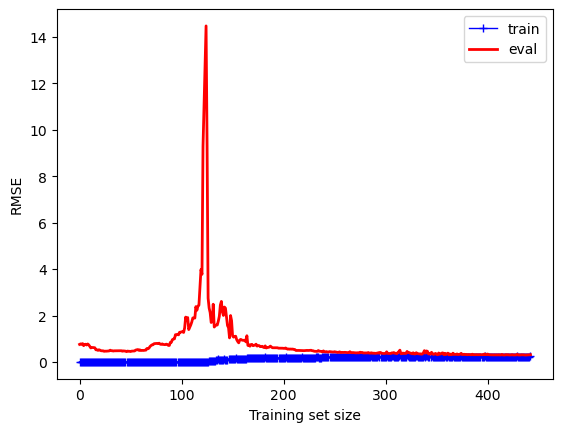

In [58]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, dataset_augemented, y)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
# plt.yscale("log")       # log to better visualize the test learning rate
plt.legend()

## (f) With the dataset generated in the task above (dataset_augmented), train a Linear Regression model with Lasso regularization. Comment on the importance of each feature and reason over the number of features selected with different values of 𝛼. Verify how the model performances change with different values of 𝛼 (different number of features). Use a plot of your choice

here I create a Lasso model and do a grid search for various values of alpha to check on

c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+01, tolerance: 2.683e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

Index(['BMR (Calories)'], dtype='object')


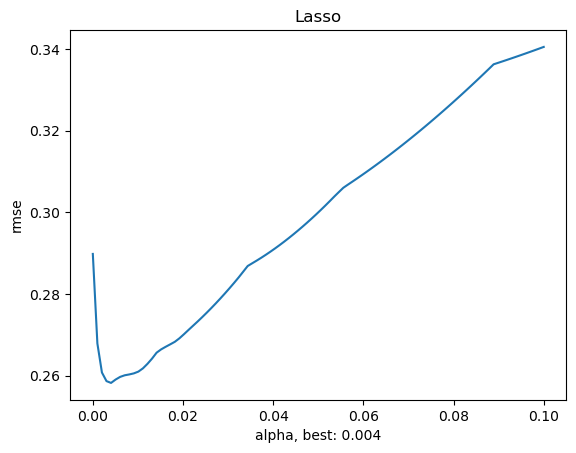

In [59]:
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented, y, test_size=0.25, random_state=42)

alphas = np.linspace(0, 0.1, 100)
minmum_rmse_a = np.inf
best_alpha = 0.000001       # keep alpha low so that there is improvement
rmse_list = []

for a in alphas:
    lasso_reg = Lasso(alpha=a, random_state=42)
    lasso_reg.fit(X_train, y_train)

    rmse = np.sqrt(np.mean((lasso_reg.predict(X_test) - y_test)**2))
    rmse_list.append(rmse)

    if rmse < minmum_rmse_a:
        minmum_rmse_a = rmse
        best_alpha = a

plt.plot(alphas, rmse_list)
plt.xlabel(f"alpha, best: {round(best_alpha, 3)}")
plt.ylabel("rmse")
plt.title("Lasso")

f_idx = np.where(lasso_reg.coef_ != 0)[0]
print(dataset_augemented[dataset_augemented.columns[f_idx]].columns)    # best features to be selected according to lasso

In [60]:
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.8636766832531845

Showed by the plot, the Lasso regularization implies that not many features are needed to be removed in terms of the rmse of the model and by the best value of alpha being low

(g) With the complete dataset generated above (dataset_augmented), train a
Ridge Regression model identifying the best value of the regularization coefficient 𝜶 that allows the model to achieve the best generalization performances.
Evaluate the generalization performances of the model.

here again I do a grid search for the best alpha bit this time for the Ridge regression

Text(0.5, 1.0, 'Ridge')

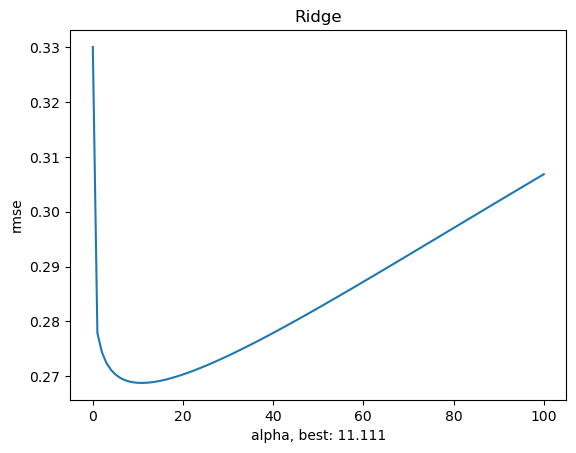

In [61]:
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented, y, test_size=0.25, random_state=42)

alphas = np.linspace(0, 100, 100)
minmum_rmse_a = np.inf
best_alpha = 0.1
rmse_list = []

for a in alphas:
    ridge_reg = Ridge(alpha=a, random_state=42)
    ridge_reg.fit(X_train, y_train)

    rmse = np.sqrt(np.mean((ridge_reg.predict(X_test) - y_test)**2))
    rmse_list.append(rmse)

    if rmse < minmum_rmse_a:
        minmum_rmse_a = rmse
        best_alpha = a

plt.plot(alphas, rmse_list)
plt.xlabel(f"alpha, best: {round(best_alpha, 3)}")
plt.ylabel("rmse")
plt.title("Ridge")

In [62]:
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.8523409547538494

From this value of alpha, it is imploed that most of the features need to be weighted down to perform the best

### (2. NOT knowing the subjects’ Basal Metabolic Rate (BMR) at the beginning of the diet period (excluding the BMR (Calories) variable from the set of available information).)

## (a) Linear Regression exploiting the sklearn implementation of the algorithm.

In [63]:
dataset_reduced_1 = dataset_reduced.drop(columns="BMR (Calories)")
y = scaled_data["Final Weight (lbs)"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_1, y, test_size=0.25, random_state=42)

In [65]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

-0.046554984527497956

In [66]:
rmse_sk_reg_no_bmr = np.sqrt(np.mean(lin_reg.predict(X_test) - y_test)**2)
rmse_sk_reg_no_bmr

0.08752209168988846

Here after training the built in model I can clearly see that its performing worse without the bmr column

(b) Linear Regression exploiting a Batch Gradient Descent learning procedure
(not the sklearn implementation).
Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.

once again I repeat all the coding except for a dataset without the BMR in the features

Text(0, 0.5, 'RMSE')

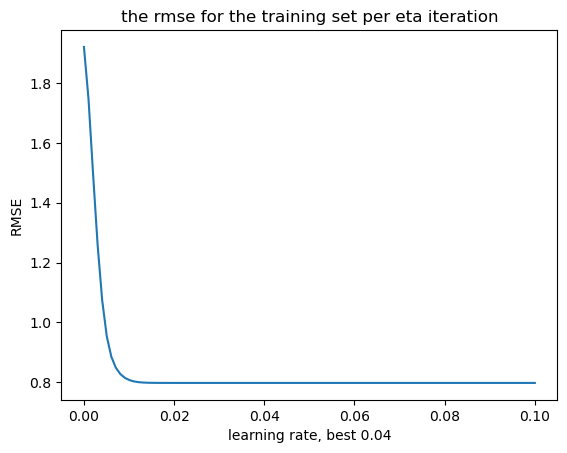

In [67]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.1, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

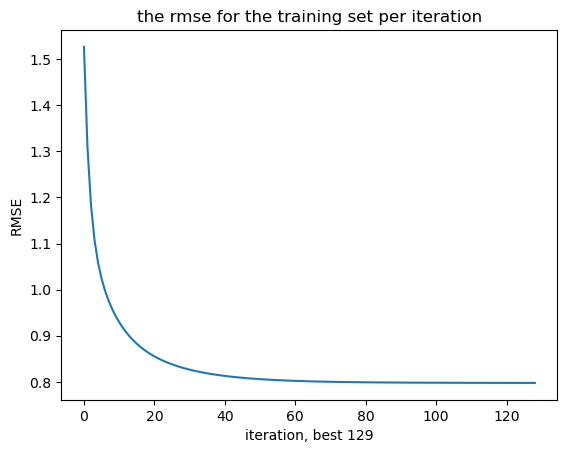

In [68]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.01
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

In [69]:
best_theta_batch = theta

The rmse in this case is higher than when we had the bmr

## (c) Linear Regression exploiting a Mini-Batch Gradient Descent learning procedure (not the sklearn implementation), exploiting a mini-batch size of maximum 128 samples (use mini-batch sizes as power of 2). Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.


Text(0, 0.5, 'RMSE')

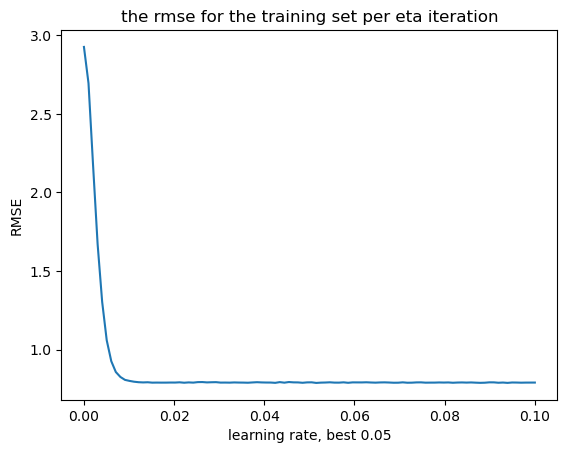

In [70]:
learning_rates = np.linspace(0, 0.1, 100)
epoches = 100
batch_size = 50
m, n = X_b.shape

minimum_rmse = [np.inf]

rmse_train = []

theta = np.random.randn(n, 1)

for eta in learning_rates:
    epoche_rmse = []

    for epoche in range(epoches):
        rnd_idx = np.random.permutation(m)
        X_shuffled = X_b[rnd_idx]
        y_shuffled = y[rnd_idx]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)
            theta = theta - eta * gradients

            rmse = np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2))

            norm_gradients = np.linalg.norm(gradients)

            epoche_rmse.append(rmse)
        
    if np.mean(epoche_rmse) < minimum_rmse:
        minimum_rmse = np.mean(epoche_rmse)
        best_eta = eta

    rmse_train.append(np.mean(epoche_rmse))

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

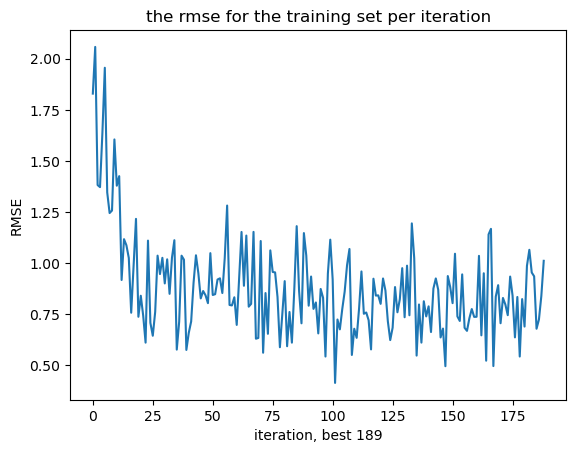

In [71]:
eta = best_eta
epoches = 2000
batch_size = 50
tollerance = 0.037
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

j = 0
for epoche in range(epoches):
    rnd_idx = np.random.permutation(m)
    X_shuffled = X_b[rnd_idx]
    y_shuffled = y[rnd_idx]

    epoche_n_g = []

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)
        theta = theta - eta * gradients

        norm_gradients = np.linalg.norm(gradients)
        epoche_n_g.append(norm_gradients)

    rmse_train.append(np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2)))

    j += 1
    if np.mean(epoche_n_g) < tollerance:
        break

plt.plot(range(j), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {j}")
plt.ylabel("RMSE")

in this case of mini batch GD I can see that it takes many more iterations to reach a tollerance 

In [72]:
best_theta_mini_batch = theta

In [73]:
X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))

rmse_mini_batch_reduced_without_bmr = np.sqrt(np.mean((X_b_test.dot(best_theta_mini_batch) - y_b_test)**2))
rmse_batch_reduced_without_bmr = np.sqrt(np.mean((X_b_test.dot(best_theta_batch) - y_b_test)**2))

to determine the best learning rates I just apply the same strategy from done before just on this data without the bmr

## (d) Consider the complete dataset and eventually add interaction or polynomialfeatures (dataset_augmented). With this dataset, train a new Linear regression model based on a Batch Gradient Descent learning procedure (not the sklearn implementation). Identify the best value of learning rate 𝜂 and an appropriate number of iterations which ensures the convergence of the model.

here I repeated the process to find the best degree but this time only on the data without BMR

Text(0, 0.5, 'rmse')

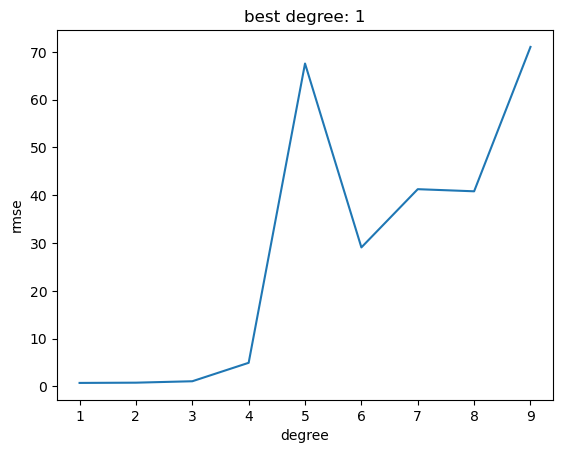

In [74]:
min_socre = np.inf
best_degree = 1
degrees = range(1, 10)

rmse_list = []

for deg in degrees:
    poly_features = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly_features.fit_transform(X_train)

    X_poly_test = poly_features.transform(X_test)

    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y_train)
    rmse = np.sqrt(np.mean((lin_reg.predict(X_poly_test) - y_test)**2))

    rmse_list.append(rmse)

    if rmse < min_socre:
        min_socre = rmse
        best_degree = deg

plt.plot(degrees, rmse_list)
plt.title(f"best degree: {best_degree}")
plt.xlabel("degree")
plt.ylabel("rmse")

In [75]:
poly_features = PolynomialFeatures(degree=best_degree, include_bias=False)
dataset_augemented_1 = poly_features.fit_transform(X.drop(columns="BMR (Calories)"))
dataset_augemented_1 = pd.DataFrame(dataset_augemented_1)

for i, col in enumerate(X.drop(columns="BMR (Calories)").columns):
    dataset_augemented_1.rename({dataset_augemented_1.columns[i]: col}, axis=1, inplace=True)

dataset_augemented_1.columns = dataset_augemented_1.columns.astype(str)

Text(0, 0.5, 'RMSE')

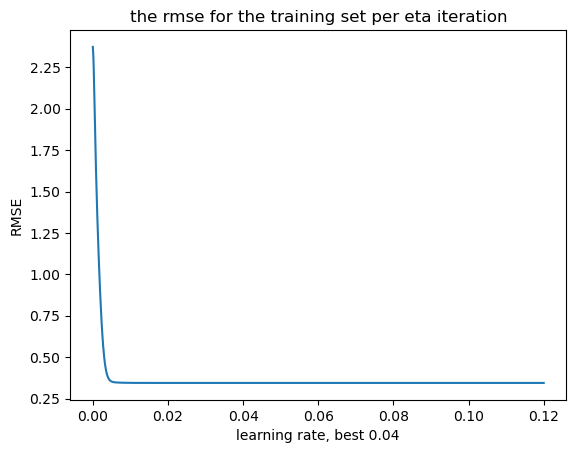

In [76]:
y = scaled_data["Final Weight (lbs)"]
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented_1, y, test_size=0.25, random_state=42)

X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.12, 1000)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

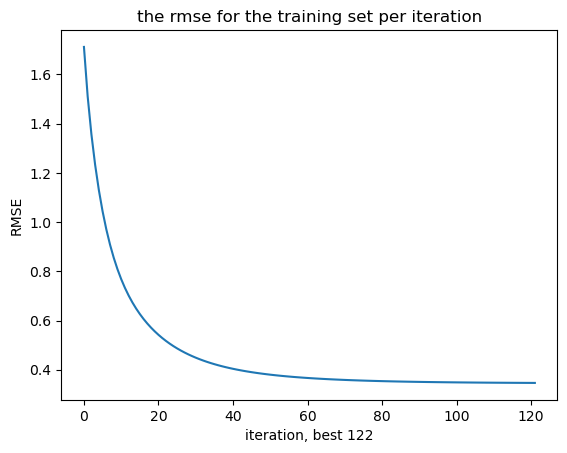

In [77]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.02
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

although increasing the tollerance and finding the best interval to test out the etas, the dataset without BMR seems to not have a simple eta to find even with scaled data

when the bmr is removed from the dataset, according to the various iterations for the polynomial degree, it seems like degree 2 is best, but this imposes a problem. The eta value for some reason seems to be very hard to find or in a very tiny interval. Thus making the search for the ideal eta and ideal number of iterations harder.

## (e) Compare the related learning curve of the Gradient Descent-based approaches developed above and comment both on the learning procedure and on the generalization performances of the model.

In [78]:
dataset_reduced_1

,Age,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Gender,Public
1,0.800000,1.746943,0.047767,-0.333333,2.0,1.000000,1.0
2,-0.600000,-0.965157,0.370534,0.000000,-1.0,1.000000,0.0
4,0.000000,-0.402123,0.785443,1.000000,0.0,1.000000,0.0
6,-0.200000,-0.115683,-0.706962,-1.666667,1.0,1.000000,0.0
10,-0.176085,0.840658,0.585443,-0.666667,2.0,1.000000,0.0
...,...,...,...,...,...,...,...
595,0.100000,0.157742,-1.333544,-1.000000,0.0,0.000000,0.0
596,0.300000,-0.407261,0.871519,0.333333,1.0,0.000000,1.0
597,0.100000,-0.730713,-0.661392,0.666667,0.0,0.153863,0.0
598,0.300000,-0.094839,0.875316,-0.333333,0.0,0.000000,0.0


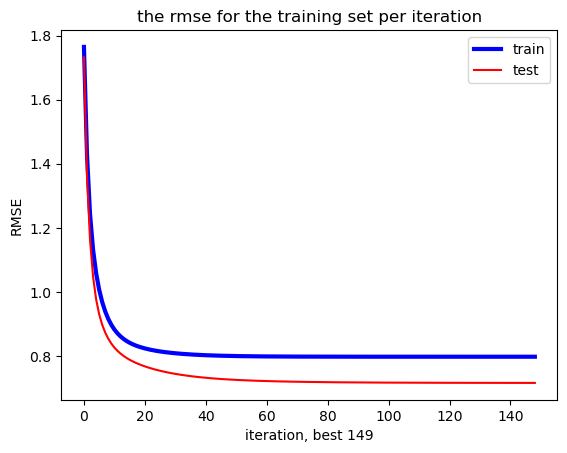

In [79]:
# reduced dataset with best learning rate
y = scaled_data["Final Weight (lbs)"]

X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_1, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

The learning curves for sme reason tend to perform better in the test set although I made sure to check if the right theta was  being used

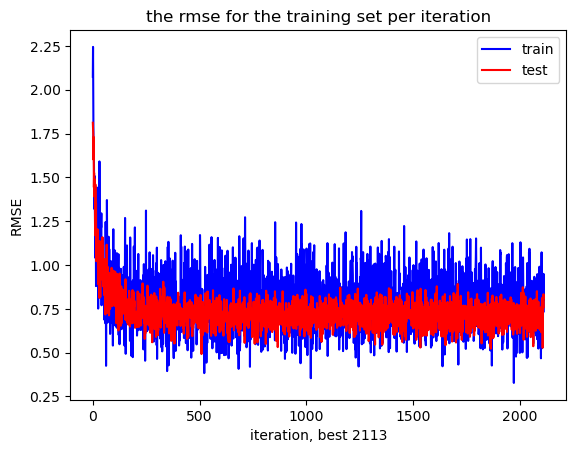

In [80]:
# for mini batch and reduced data

X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_1, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))

eta = best_eta
epoches = 4000
batch_size = 50
tollerance = 0.035
m, n = X_b.shape
m_t, n_t = X_b_test.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

j = 0
for epoche in range(epoches):
    rnd_idx = np.random.permutation(m)
    rnd_idx_t = np.random.permutation(m_t)

    X_shuffled = X_b[rnd_idx]
    y_shuffled = y_b[rnd_idx]

    X_shuffled_t = X_b_test[rnd_idx_t]
    y_shuffled_t = y_b_test[rnd_idx_t]

    epoche_n_g = []

    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        gradients = (2/m)*X_batch.T.dot(X_batch.dot(theta)-y_batch)

        theta = theta - eta * gradients

        norm_gradients = np.linalg.norm(gradients)

        epoche_n_g.append(norm_gradients)

    rmse_train.append(np.sqrt(np.mean((X_batch.dot(theta) - y_batch)**2)))

    for i in range(0, m_t, batch_size):
        
        X_batch_t = X_shuffled_t[i:i+batch_size]
        y_batch_t = y_shuffled_t[i:i+batch_size]

    rmse_test.append(np.sqrt(np.mean((X_batch_t.dot(theta) - y_batch_t)**2)))

    j += 1
    if np.mean(epoche_n_g) < tollerance:
        break

plt.plot(range(j), rmse_train, "b", label="train")
plt.plot(range(j), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {j}")
plt.ylabel("RMSE")
plt.legend()

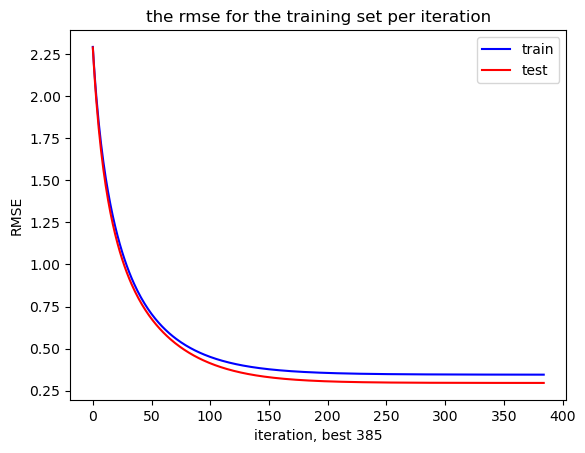

In [81]:
# learning curve for the data augmented

X_train, X_test, y_train, y_test = train_test_split(dataset_augemented_1, y, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = data_augmented_best_eta
iterations = 3000
tollerance = 0.01
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

even after increasing the iterations and the tollerance, the data without the BMR cant reach the same results as the data with BMR

## (f) With the dataset generated in the task above (dataset_augmented), train a Linear Regression model with Lasso regularization. Comment on the importance of each feature and reason over the number of features selected with different values of 𝛼. Verify how the model performances change with different values of 𝛼 (different number of features). Use a plot of your choice.

c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+01, tolerance: 2.683e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

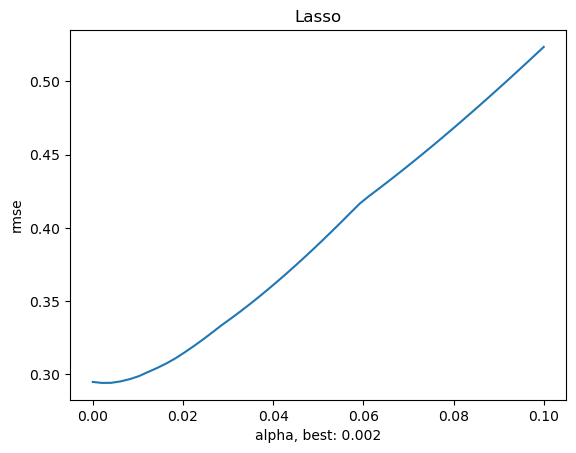

In [82]:
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented_1, y, test_size=0.25, random_state=42)

alphas = np.linspace(0, 0.1, 50)
minmum_rmse_a = np.inf
best_alpha = 0.000001
rmse_list = []

for a in alphas:
    lasso_reg = Lasso(alpha=a, random_state=42)
    lasso_reg.fit(X_train, y_train)

    rmse = np.sqrt(np.mean((lasso_reg.predict(X_test) - y_test)**2))
    rmse_list.append(rmse)

    if rmse < minmum_rmse_a:
        minmum_rmse_a = rmse
        best_alpha = a

plt.plot(alphas, rmse_list)
plt.xlabel(f"alpha, best: {round(best_alpha, 3)}")
plt.ylabel("rmse")
plt.title("Lasso")

f_idx = np.where(lasso_reg.coef_ != 0)[0]
# print(dataset_augemented[dataset_augemented_1.columns[f_idx]].columns)    # best features to be selected according to lasso

Since the most important feature is gone (BMR), lasso is not suggesting to remove almost any variable

In [83]:
lasso_reg = Lasso(alpha=best_alpha)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)

0.8232031308990583

Here once again the lasso regulirization has a pretty low alpha thus the models best performance is when most of the features are available

## (g) With the complete dataset generated above (dataset_augmented), train a Ridge Regression model identifying the best value of the regularization coefficient 𝜶 that allows the model to achieve the best generalization performances. Evaluate the generalization performances of the model.

Text(0.5, 1.0, 'Ridge')

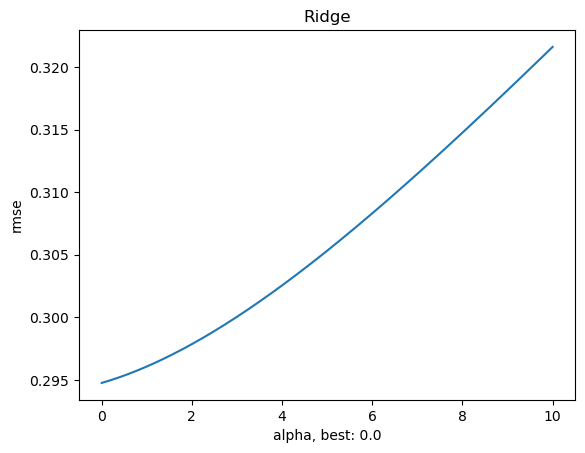

In [84]:
X_train, X_test, y_train, y_test = train_test_split(dataset_augemented_1, y, test_size=0.25, random_state=42)

alphas = np.linspace(0, 10, 1000)
minmum_rmse_a = np.inf
best_alpha = 0.1
rmse_list = []

for a in alphas:
    ridge_reg = Ridge(alpha=a, random_state=42)
    ridge_reg.fit(X_train, y_train)

    rmse = np.sqrt(np.mean((ridge_reg.predict(X_test) - y_test)**2))
    rmse_list.append(rmse)

    if rmse < minmum_rmse_a:
        minmum_rmse_a = rmse
        best_alpha = a

plt.plot(alphas, rmse_list)
plt.xlabel(f"alpha, best: {round(best_alpha, 3)}")
plt.ylabel("rmse")
plt.title("Ridge")

the ridge regression also suggests to keep the weights of the features the same to be able to generalize better the model

In [85]:
ridge_reg = Ridge(alpha=best_alpha)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)

0.8224030050140388

c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.00325e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\William\Documents\SUPSI\semester 1&2\DataProject2024\Lib\site-packages\sklearn\linear_model\_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.10232e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
c:\Users

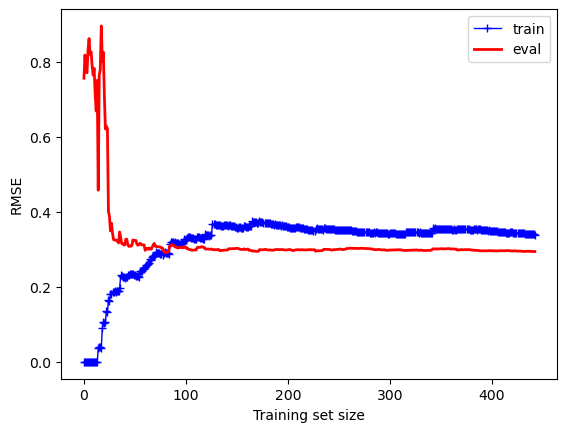

In [86]:
lin_reg = LinearRegression()
plot_learning_curves(ridge_reg, dataset_augemented_1, y)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()

It is clear that the bmr was an important feature, if we compare this learning curve to the one done with bmr we can defenetly tell that the previous was better.

# 4. Now, let’s stratify the problem according to gender. Using the dataset_reduced, build two different supervised systems (one considering only the male subjects and one considering only the female subjects) based on Linear Regression which are capable of predicting the Final Weight (lbs) under the two conditions specified in the preamble. Optimize, per each system, the number of iterations of the learning procedure and the learning rate 𝜂. Plot the related learning curves and compare them.

### (1. Knowing in advance the subjects’ Basal Metabolic Rate (BMR) at the beginning of the diet period (variable BMR (Calories) included in the set of available information))


I divided the data in two one for each gender

In [87]:
if "Gender" not in dataset_reduced.columns:
    dataset_reduced = pd.concat([dataset_reduced, X["Gender"]], axis=1)

dataset_reduced_m = dataset_reduced.groupby("Gender").get_group(1)
y_m = y[dataset_reduced_m.index]
dataset_reduced_f = dataset_reduced.groupby("Gender").get_group(0)
y_f = y[dataset_reduced_f.index]


the male dataset is slightly bigger but it shouldnt serve as impact for the models

In [88]:
print(len(y_m))
print(len(y_f))

257
245


### MALES

did the same methods to find the best eta and iteration to stop as previously done just this time on these new datasets

In [89]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_m, y_m, test_size=0.25, random_state=42)

Text(0, 0.5, 'RMSE')

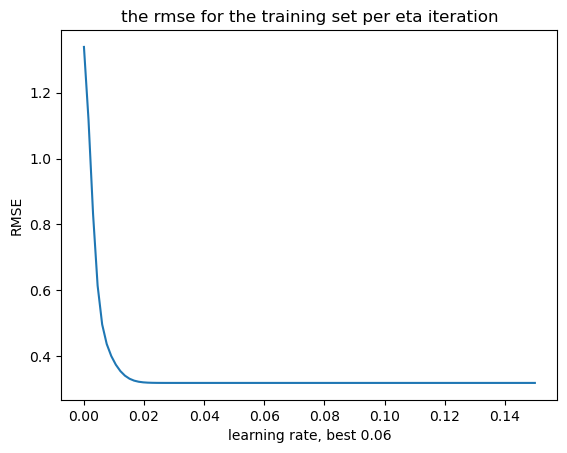

In [90]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.15, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

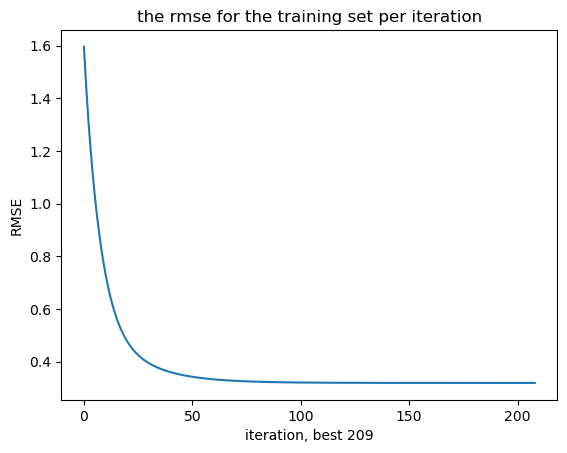

In [91]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

In [92]:
m_best_theta = theta

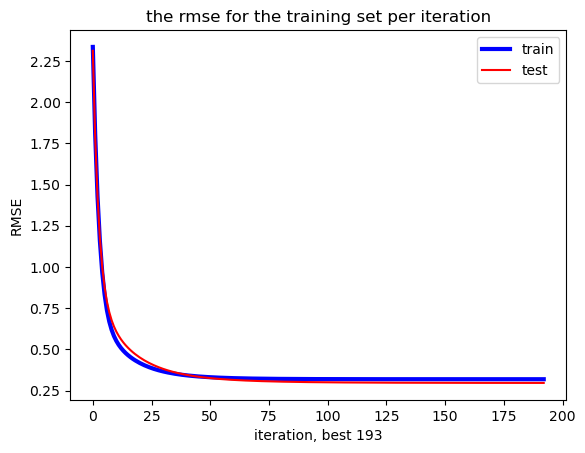

In [93]:
# reduced dataset with best learning rate
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_m, y_m, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

In [94]:
rmse_m_with_bmr = np.sqrt(np.mean((X_b_test.dot(m_best_theta) - y_b_test)**2))

### FEMALES

In [95]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_f, y_f, test_size=0.25, random_state=42)

Text(0, 0.5, 'RMSE')

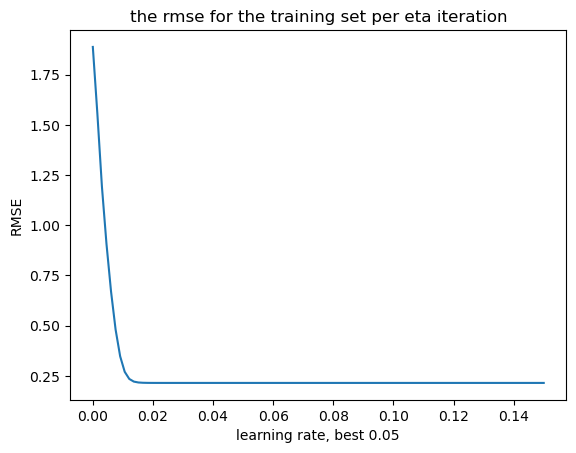

In [96]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.15, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

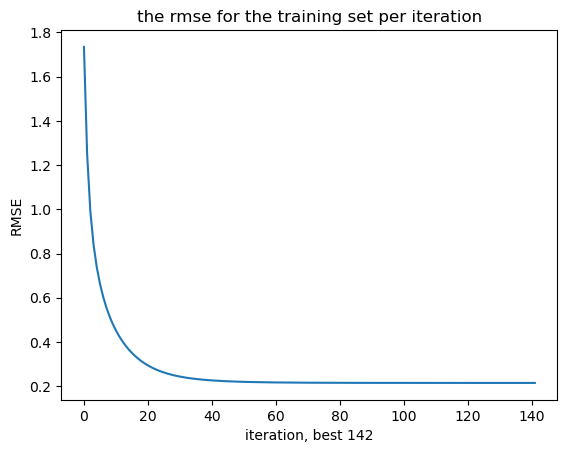

In [97]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

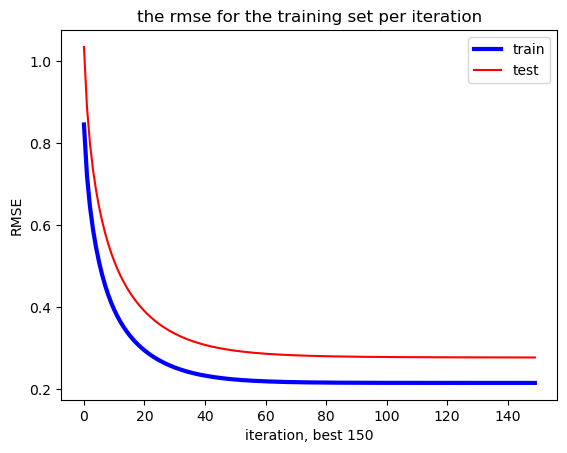

In [98]:
# reduced dataset with best learning rate
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_f, y_f, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

In [99]:
f_best_theta = theta
rmse_f_with_bmr = np.sqrt(np.mean((X_b_test.dot(f_best_theta) - y_b_test)**2))

### (2. NOT knowing the subjects’ Basal Metabolic Rate (BMR) at the beginning of the diet period (excluding the BMR (Calories) variable from the set of available information).)

Here after splitting the data in females and males, I can reason that the learning rates are very similar in terms of rmse

In [100]:
if "Gender" not in dataset_reduced.columns:
    dataset_reduced = pd.concat([dataset_reduced, X["Gender"]], axis=1)

dataset_reduced_m = dataset_reduced.groupby("Gender").get_group(1)
dataset_reduced_m.drop(columns="BMR (Calories)", inplace=True)
y_m = y[dataset_reduced_m.index]
dataset_reduced_f = dataset_reduced.groupby("Gender").get_group(0)
dataset_reduced_f.drop(columns="BMR (Calories)", inplace=True)
y_f = y[dataset_reduced_f.index]

C:\Users\William\AppData\Local\Temp\ipykernel_17100\2967720996.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced_m.drop(columns="BMR (Calories)", inplace=True)
C:\Users\William\AppData\Local\Temp\ipykernel_17100\2967720996.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_reduced_f.drop(columns="BMR (Calories)", inplace=True)


### Males without bmr

In [101]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_m, y_m, test_size=0.25, random_state=42)

Text(0, 0.5, 'RMSE')

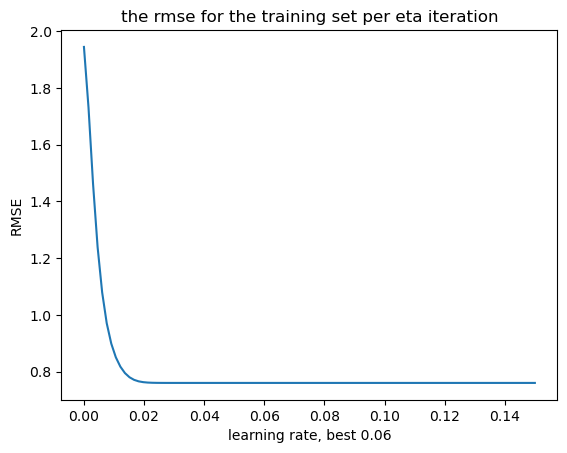

In [102]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.15, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

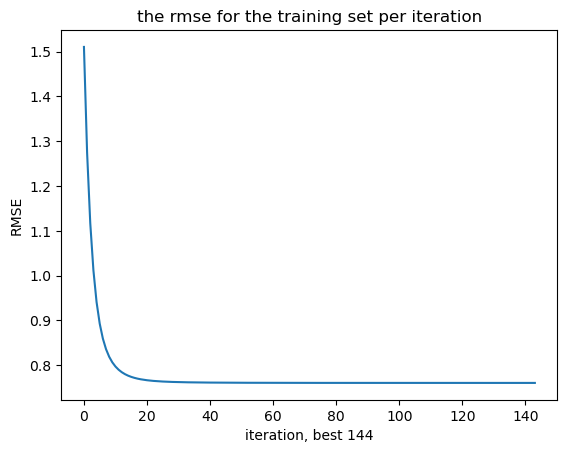

In [103]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

In [104]:
m_best_theta = theta

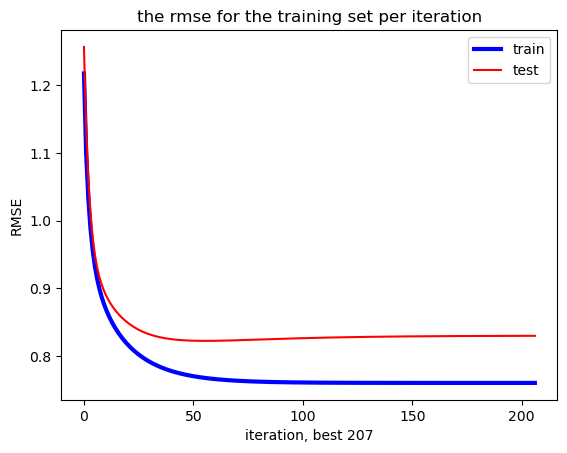

In [113]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_m, y_m, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

In [106]:
rmse_m_without_bmr = np.sqrt(np.mean((X_b_test.dot(m_best_theta) - y_b_test)**2))

### Females without bmr

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_f, y_f, test_size=0.25, random_state=42)

Text(0, 0.5, 'RMSE')

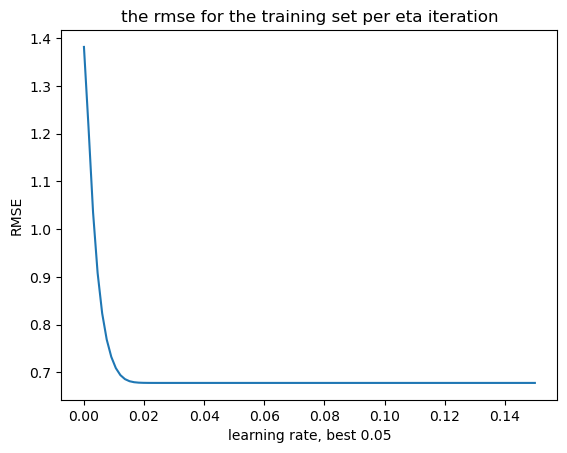

In [108]:
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

learning_rates = np.linspace(0, 0.15, 100)
iterations = 100
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)
minimum_rmse = np.inf

for eta in learning_rates:
    for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)

        rmse = np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))

        theta = theta - eta * gradients

        if rmse < minimum_rmse:
            minimum_rmse = rmse
            best_eta = eta

    rmse_train.append(rmse)

plt.plot(learning_rates, rmse_train)
plt.title("the rmse for the training set per eta iteration")
plt.xlabel(f"learning rate, best {round(best_eta, 2)}")
plt.ylabel("RMSE")

Text(0, 0.5, 'RMSE')

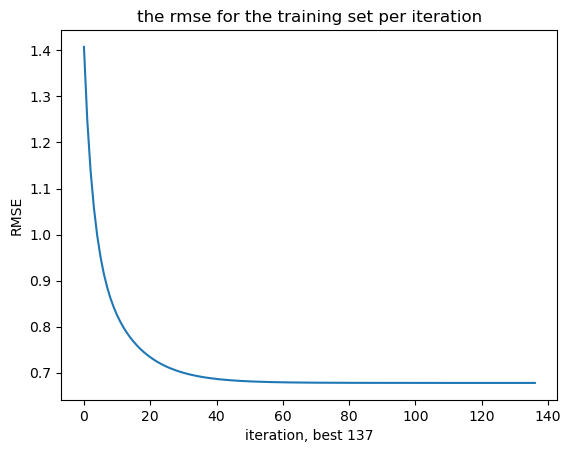

In [109]:
learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train)
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")

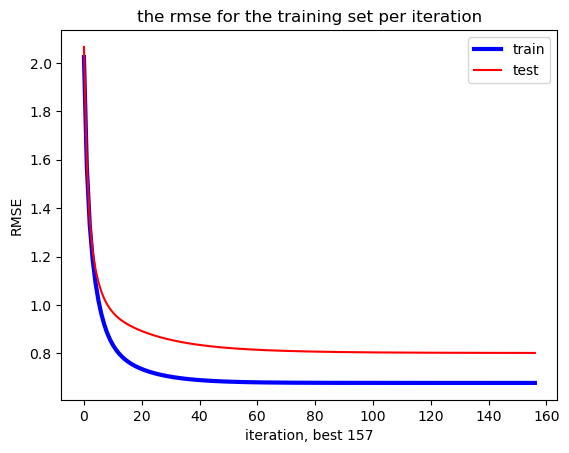

In [110]:
# reduced dataset with best learning rate
X_train, X_test, y_train, y_test = train_test_split(dataset_reduced_f, y_f, test_size=0.25, random_state=42)
X_b = np.c_[np.ones((len(X_train), 1)), X_train]
y_b = np.array(y_train.values.reshape(len(y_train), 1))

X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]
y_b_test = np.array(y_test.values.reshape(len(y_test), 1))


learning_rates = best_eta
iterations = 1000
tollerance = 0.001
m, n = X_b.shape

rmse_train = []
rmse_test = []

theta = np.random.randn(n, 1)

i = 0
for iteration in range(iterations):
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta)-y_b)
        theta = theta - eta * gradients

        rmse_train.append(np.sqrt(np.mean((X_b.dot(theta) - y_b)**2))) 
        rmse_test.append(np.sqrt(np.mean((X_b_test.dot(theta) - y_b_test)**2))) 

        norm_gradients = np.linalg.norm(gradients)
        i += 1
        if norm_gradients < tollerance:
            break

plt.plot(range(i), rmse_train, "b", linewidth=3, label="train")
plt.plot(range(i), rmse_test, "r", label="test")
plt.title("the rmse for the training set per iteration")
plt.xlabel(f"iteration, best {i}")
plt.ylabel("RMSE")
plt.legend()

In [111]:
f_best_theta = theta
rmse_f_without_bmr = np.sqrt(np.mean((X_b_test.dot(f_best_theta) - y_b_test)**2))

And as expected, the data without the bmr performed worse

# 5. On this task you are going to reason on the approaches based on the dataset_reduced. Do the gender-stratified approach (task 4) lead to better performances with respect to the global approach (task 3)?" For this task, measure how well each different approach developed above on dataset_reduced is capable of predicting the Final Weight (lbs) (under the conditions specified in the preamble) over the two genders present in the dataset. The performances to compare are the ones calculated only on test samples related to each specific gender. Visualize the obtained results.


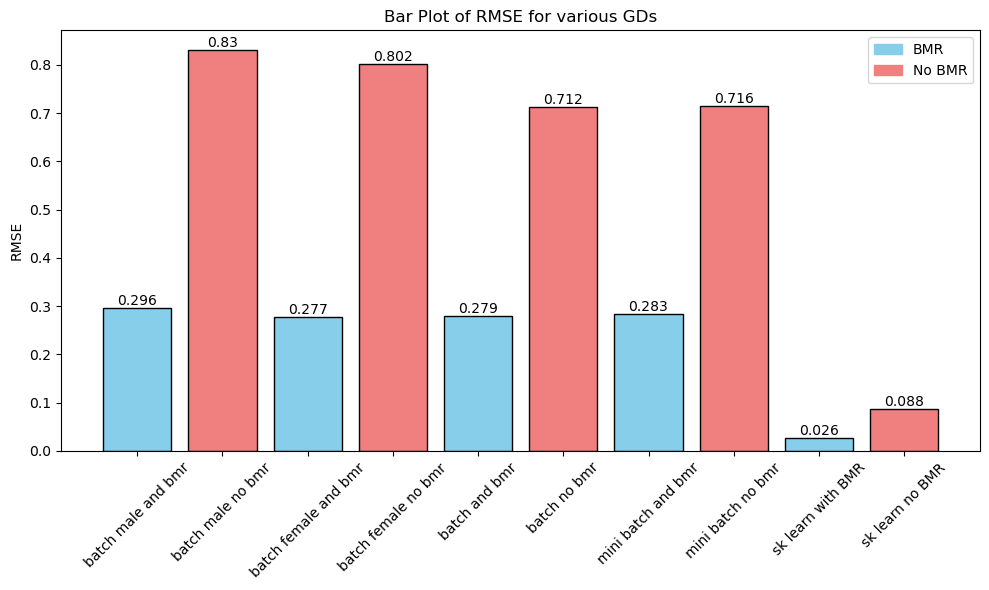

In [112]:
values = [rmse_m_with_bmr, rmse_m_without_bmr, rmse_f_with_bmr, rmse_f_without_bmr, rmse_batch_reduced_with_bmr, rmse_batch_reduced_without_bmr, rmse_mini_batch_reduced_with_bmr, rmse_mini_batch_reduced_without_bmr, rmse_sk_reg_bmr, rmse_sk_reg_no_bmr]
labels = ["batch male and bmr", "batch male no bmr", "batch female and bmr", "batch female no bmr", "batch and bmr", "batch no bmr", "mini batch and bmr", "mini batch no bmr", "sk learn with BMR", "sk learn no BMR"]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['skyblue', "lightcoral", 'skyblue', "lightcoral", 'skyblue', "lightcoral", 'skyblue', "lightcoral"], edgecolor='black')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 3)}', ha='center', va='bottom')


plt.title("Bar Plot of RMSE for various GDs")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.tight_layout()
legend_elements = [Patch(color='skyblue', label='BMR'), Patch(color='lightcoral', label='No BMR')]
plt.legend(handles=legend_elements)


I created the bar charts based on the RMSE of the final theta after a bunch of iterations based the various different reduced data gradiant descents and sk learn linear regressions

finally we can compare the findings; data without the bmr performs worse than the one with bmr. The dataset soley constructed on female data seems to outperform the male and global data (except for the sk learn implemetation), both while having the bmr column or not.£